Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](http://https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

In [1]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [2]:
confirmed.iloc[:,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,716
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1,3,3,3,7,7,7,7,7,7
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,266,301,387,387,502,589,690,745,820,1054
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,194,235,249,265,290,329,407,424,482,532
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,19,32,39,39,53,62,71,77,78,80
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,669,669,818,1029,1219,1405,1617,1791,2032,2032


## Get Population

In [3]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [4]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,Population,region
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,"35,530,000",Afghanistan_nan
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,NaN,Albania_nan
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,"41,320,000",Algeria_nan
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,NaN,Andorra_nan
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,NaN,Angola_nan
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,7,7,7,7,7,7,NaN,Antigua and Barbuda_nan
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,387,387,502,589,690,745,820,1054,NaN,Argentina_nan
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,249,265,290,329,407,424,482,532,NaN,Armenia_nan
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,39,39,53,62,71,77,78,80,NaN,Australia_Australian Capital Territory
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,818,1029,1219,1405,1617,1791,2032,2032,"7,544,000",Australia_New South Wales


In [5]:
# merge region death
death.iloc[185:195,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,Population,region
185,NaN,Poland,51.9194,19.1451,0,0,0,0,0,0,...,10,14,16,16,18,22,31,33,"37,980,000",Poland_nan
186,NaN,Portugal,39.3999,-8.2245,0,0,0,0,0,0,...,33,43,60,76,100,119,140,160,"10,290,000",Portugal_nan
187,NaN,Qatar,25.3548,51.1839,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,NaN,Qatar_nan
188,NaN,Romania,45.9432,24.9668,0,0,0,0,0,0,...,11,17,23,26,37,43,65,82,"19,530,000",Romania_nan
189,NaN,Russia,60.0000,90.0000,0,0,0,0,0,0,...,1,3,3,4,4,8,9,17,"144,500,000",Russia_nan
190,NaN,Rwanda,-1.9403,29.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,Rwanda_nan
191,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,Saint Lucia_nan
192,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,Saint Vincent and the Grenadines_nan
193,NaN,San Marino,43.9424,12.4578,0,0,0,0,0,0,...,21,21,21,21,22,22,25,26,NaN,San Marino_nan
194,NaN,Saudi Arabia,24.0000,45.0000,0,0,0,0,0,0,...,1,2,3,3,4,8,8,10,NaN,Saudi Arabia_nan


In [6]:
# merge region recover
recover.iloc[175:185,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,Population,region
175,NaN,Oman,21.0000,57.0000,0,0,0,0,0,0,...,17,17,23,23,23,23,29,34,"4,636,000",Oman_nan
176,NaN,Pakistan,30.3753,69.3451,0,0,0,0,0,0,...,18,21,21,23,29,29,76,76,"197,000,000",Pakistan_nan
177,NaN,Panama,8.5380,-80.7821,0,0,0,0,0,0,...,1,1,2,2,2,4,4,9,NaN,Panama_nan
178,NaN,Papua New Guinea,-6.3150,143.9555,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,Papua New Guinea_nan
179,NaN,Paraguay,-23.4425,-58.4438,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,NaN,Paraguay_nan
180,NaN,Peru,-9.1900,-75.0152,0,0,0,0,0,0,...,1,1,14,16,16,16,53,394,NaN,Peru_nan
181,NaN,Philippines,13.0000,122.0000,0,0,0,0,0,0,...,20,26,28,31,35,42,42,49,"104,900,000",Philippines_nan
182,NaN,Poland,51.9194,19.1451,0,0,0,0,0,0,...,1,7,7,7,7,7,7,7,"37,980,000",Poland_nan
183,NaN,Portugal,39.3999,-8.2245,0,0,0,0,0,0,...,22,22,43,43,43,43,43,43,"10,290,000",Portugal_nan
184,NaN,Qatar,25.3548,51.1839,0,0,0,0,0,0,...,41,41,43,43,45,48,51,62,NaN,Qatar_nan


In [7]:
confirmed.iloc[185:195,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,Population,region
185,NaN,Poland,51.9194,19.1451,0,0,0,0,0,0,...,901,1051,1221,1389,1638,1862,2055,2311,"37,980,000",Poland_nan
186,NaN,Portugal,39.3999,-8.2245,0,0,0,0,0,0,...,2362,2995,3544,4268,5170,5962,6408,7443,"10,290,000",Portugal_nan
187,NaN,Qatar,25.3548,51.1839,0,0,0,0,0,0,...,526,537,549,562,590,634,693,781,NaN,Qatar_nan
188,NaN,Romania,45.9432,24.9668,0,0,0,0,0,0,...,794,906,1029,1292,1452,1815,2109,2245,"19,530,000",Romania_nan
189,NaN,Russia,60.0000,90.0000,0,0,0,0,0,0,...,495,658,840,1036,1264,1534,1836,2337,"144,500,000",Russia_nan
190,NaN,Rwanda,-1.9403,29.8739,0,0,0,0,0,0,...,40,41,50,54,60,70,70,75,NaN,Rwanda_nan
191,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,3,3,3,3,3,9,9,13,NaN,Saint Lucia_nan
192,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,NaN,Saint Vincent and the Grenadines_nan
193,NaN,San Marino,43.9424,12.4578,0,0,0,0,0,0,...,187,208,208,223,224,224,230,236,NaN,San Marino_nan
194,NaN,Saudi Arabia,24.0000,45.0000,0,0,0,0,0,0,...,767,900,1012,1104,1203,1299,1453,1563,NaN,Saudi Arabia_nan


In [8]:
confirmed.iloc[220:230,:]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,Population,region
220,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,6,8,8,8,8,8,12,14,NaN,United Kingdom_Cayman Islands
221,Channel Islands,United Kingdom,49.3723,-2.3644,0,0,0,0,0,0,...,36,46,66,88,97,108,141,141,NaN,United Kingdom_Channel Islands
222,Gibraltar,United Kingdom,36.1408,-5.3536,0,0,0,0,0,0,...,15,26,35,55,56,65,69,69,NaN,United Kingdom_Gibraltar
223,Isle of Man,United Kingdom,54.2361,-4.5481,0,0,0,0,0,0,...,23,23,25,29,32,42,49,60,NaN,United Kingdom_Isle of Man
224,Montserrat,United Kingdom,16.7425,-62.1874,0,0,0,0,0,0,...,1,1,5,5,5,5,5,5,NaN,United Kingdom_Montserrat
225,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,8077,9529,11658,14543,17089,19522,22141,25150,"66,440,000",United Kingdom_nan
226,NaN,Uruguay,-32.5228,-55.7658,0,0,0,0,0,0,...,162,189,217,238,274,304,310,338,NaN,Uruguay_nan
227,NaN,United States,37.0902,-95.7129,1,1,2,2,5,5,...,53740,65778,83836,101657,121478,140886,161807,188172,"327,200,000",United States_nan
228,NaN,Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,...,50,60,75,88,104,144,149,172,NaN,Uzbekistan_nan
229,NaN,Venezuela,6.4238,-66.5897,0,0,0,0,0,0,...,84,91,107,107,119,119,135,135,NaN,Venezuela_nan


## Create Time Series + Plots

In [9]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [10]:

## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute

ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

Text(0.5, 1.0, 'Daily Total Recoverd - Major_4,25 2nd Areas')

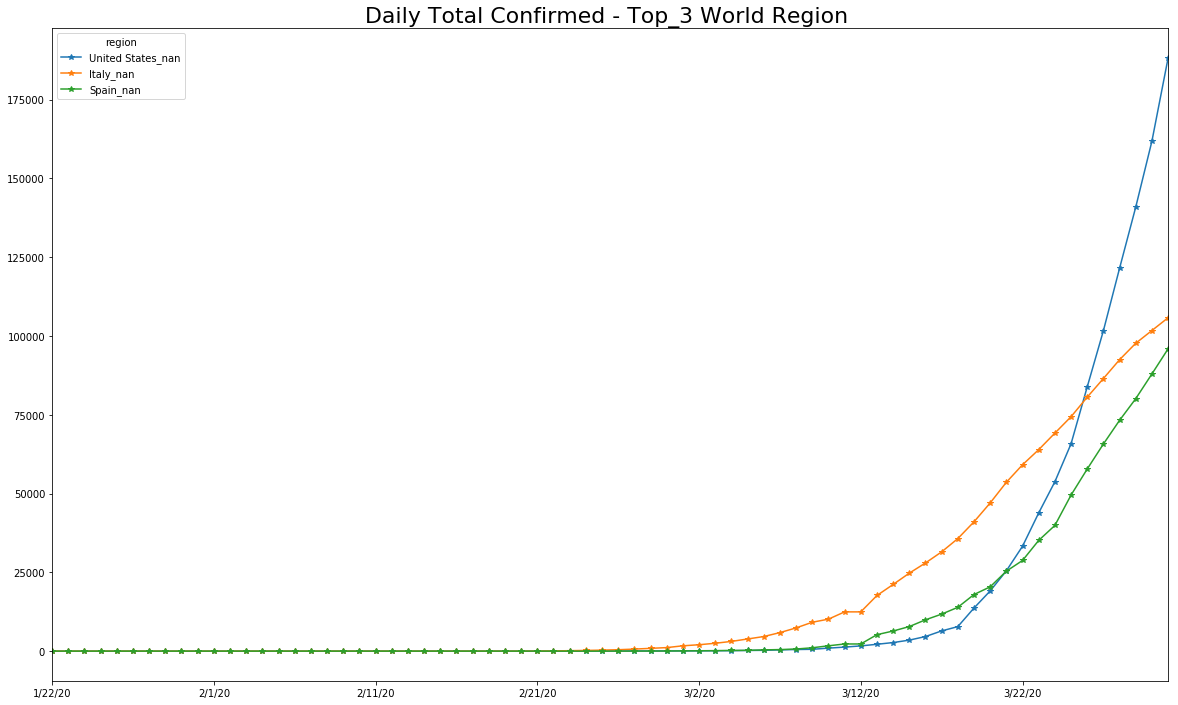

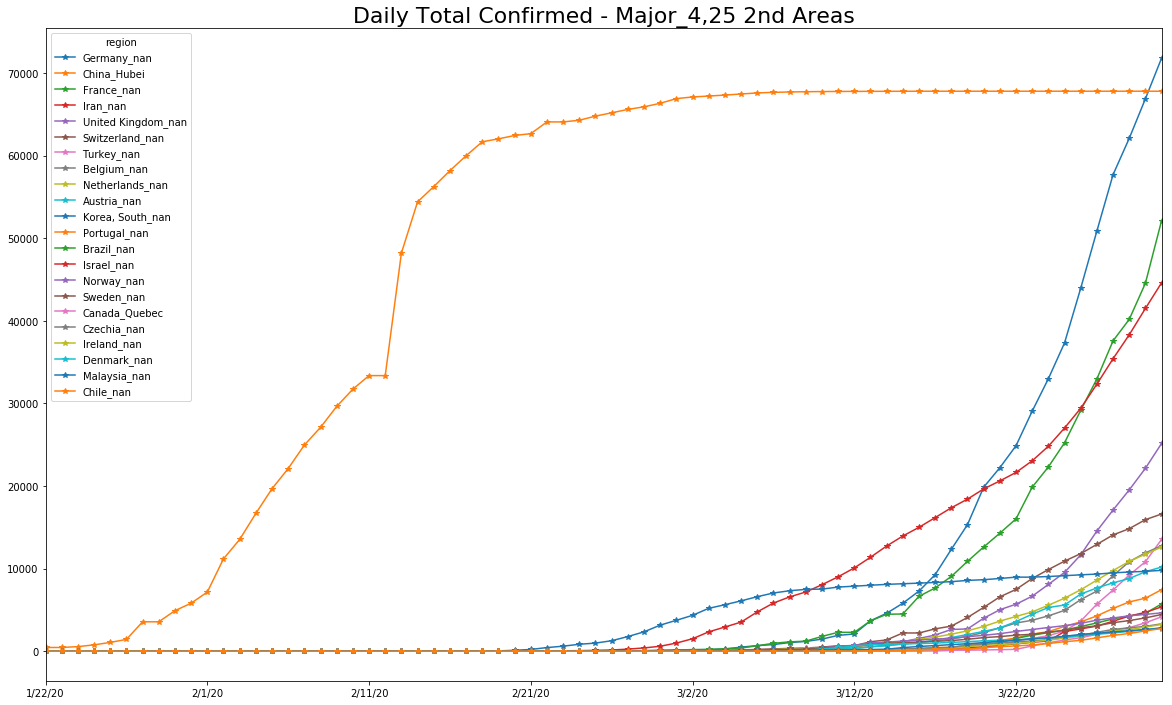

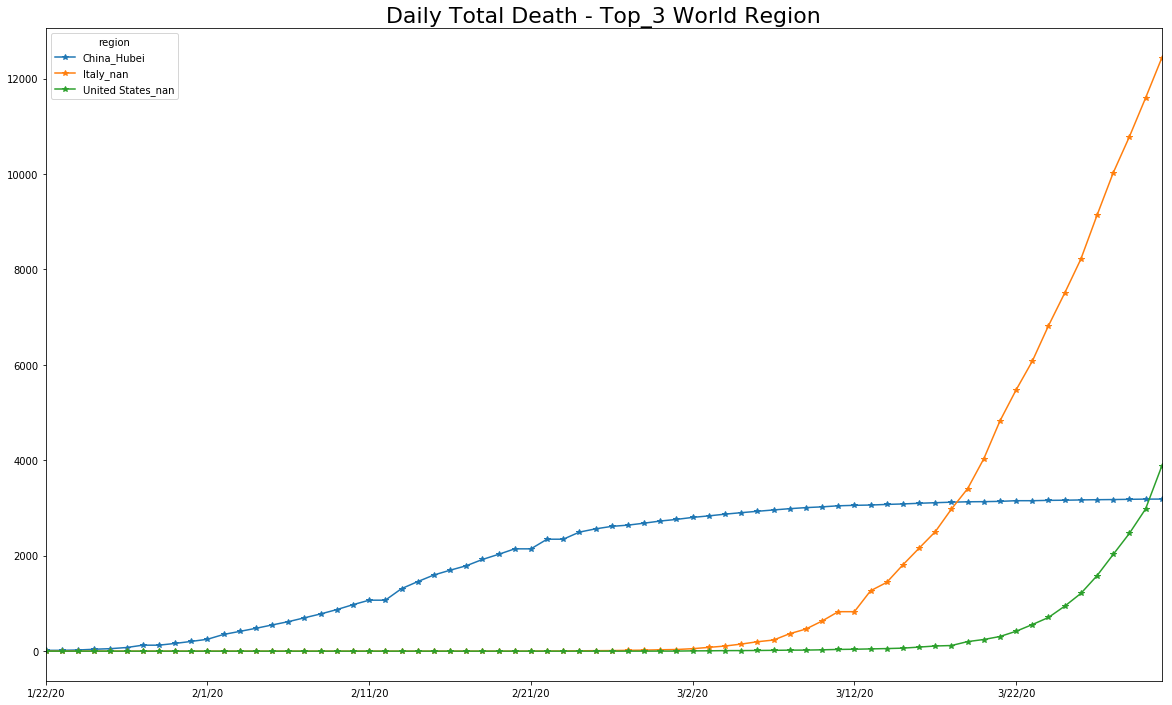

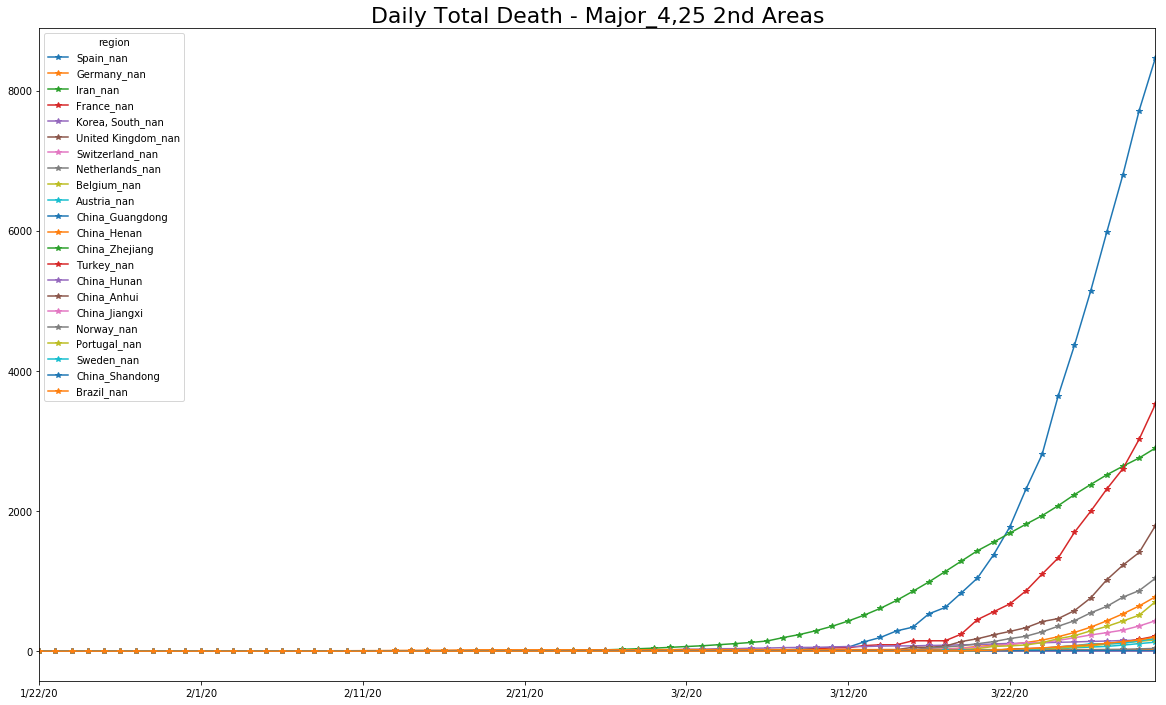

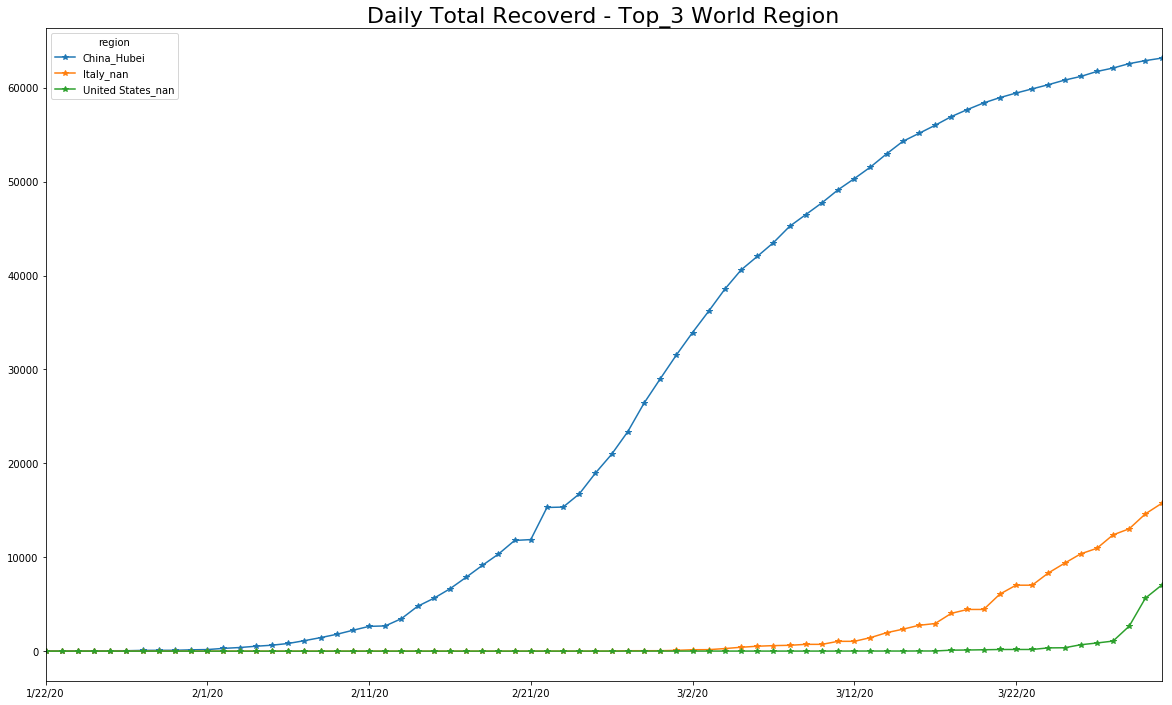

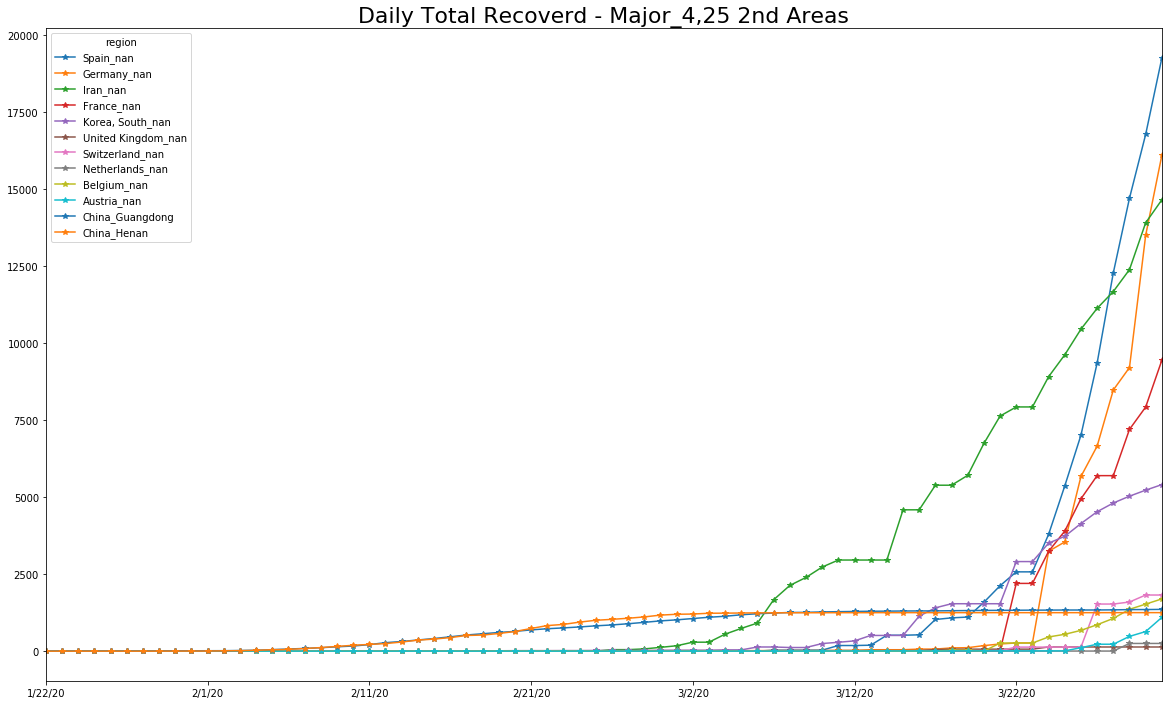

In [12]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

## Kalman Filter With R

In [13]:
# Create data for R script
ts_r=ts.reset_index()
ts_r=ts_r.rename(columns = {'index':'date'})
ts_r['date']=pd.to_datetime(ts_r['date'] ,errors ='coerce')
ts_r.to_csv(r'/home/notebookuser/notebooks/covid19/ts_2_r.csv')

In [14]:
#!pip install rpy2


In [15]:
import rpy2
%load_ext rpy2.ipython

In [16]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')


NULL


In [17]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [25]:
%%R
require(pracma)
require(Metrics)
require(readr)
Sys.setenv(TZ='GMT')
all<- read_csv("/home/notebookuser/notebooks/covid19/ts_2_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [26]:
p=%R pred_all

In [27]:
############ Merge R output due to package problem
t=ts_d
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

## Pre Proccessing Data for ML Model

### Extract Weather Data

In [28]:

#!pip install pyweatherbit

In [26]:

from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#api_key="30b114eb7ebb45069cd287adadf9d3b7" # joao@fuelbigdata.com
api_key="257c03d853ec4a9db6bd4920be591f3c" # jpacerqueira.consult.bigdata@gmail.com

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


#### Weather History

In [21]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
         'Taiwan*_nan',
         'Turkey_nan' 
       #   'Vietnam_nan',
       ]
#

In [ ]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

start_date_init='2020-04-02'
offset_days=-1 # is h! #-1 to start yesterday pick today# API free-tier just picks one per api call!
max_days=1

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_train_list:
            continue
        if confirmed.iloc[i,vpos] in my_train_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

In [48]:
w.to_csv('w_v2_v227.csv', index = False, header=True)

In [49]:
w[:]

,date,region,min,max
0,2020/03/03,Australia_New South Wales,20.8,37.5
1,2020/03/03,Belgium_nan,3.8,8.2
2,2020/03/03,Canada_Ontario,-5.0,2.1
3,2020/03/03,China_Beijing,-5.0,9.2
4,2020/03/03,China_Guangdong,18.0,27.8
5,2020/03/03,China_Hong Kong,18.4,20.6
6,2020/03/03,China_Hubei,6.8,10.8
7,2020/03/03,China_Macau,18.2,21.0
8,2020/03/03,China_Shanghai,7.0,11.5


### Extract Weather Forecast Data

In [50]:

# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

In [22]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w=pd.read_csv('/home/notebookuser/notebooks/covid19/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [23]:
w_v2_v2[:30]

,date,region,min,max
0,2020-03-03,Australia_New South Wales,18.4,22.1
1,2020-03-03,Belgium_nan,2.2,14.4
2,2020-03-03,Canada_Ontario,-13.2,8.3
3,2020-03-03,China_Beijing,1.0,14.0
4,2020-03-03,China_Guangdong,20.0,28.0
5,2020-03-03,China_Hong Kong,21.4,25.5
6,2020-03-03,China_Hubei,5.0,12.0
7,2020-03-03,China_Macau,21.4,25.0
8,2020-03-03,China_Shanghai,6.3,22.0
9,2020-03-03,Finland_nan,0.0,9.1


In [28]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2)
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'w_total.csv', index = False, header=True)

### Build Train Set Data Structure

In [29]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [30]:
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2] +1)/(t.iloc[i-2,2]-1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2] +1)/(t.iloc[i-4,2]-1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2] +1)/(t.iloc[i-8,2]-1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=round(t['kalman_prediction'],2)
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(1)
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=((train['last_day'] +1)/((train['population'] +1) *10000))
#
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2)
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)
#
train=train.merge(w_total,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in long_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in long_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in long_scalars


## Kalman 1 day Prediction with Evaluation

         region           mse          rmse           mae
70  China_Hubei  3.054826e+09  55270.480301  49097.842857


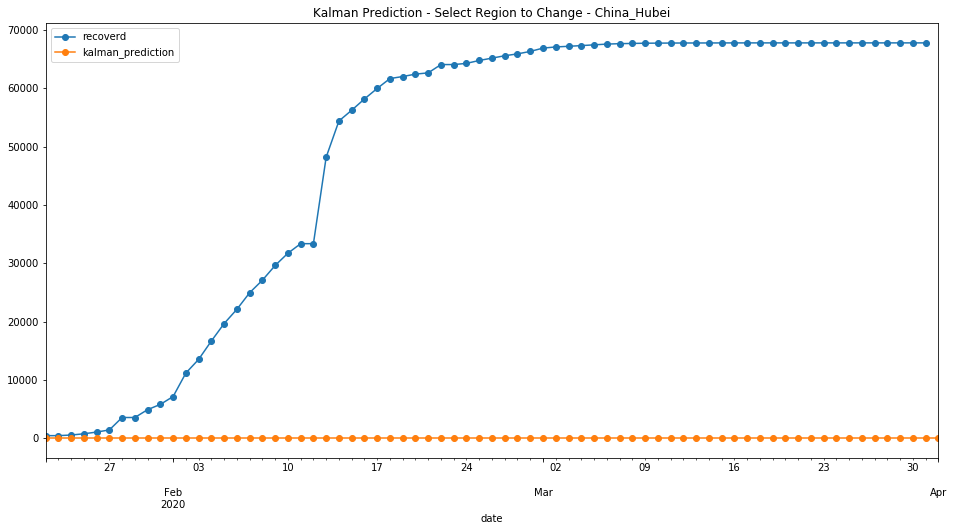

In [31]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='China_Hubei'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

            region            mse        rmse         mae
82  China_Shanghai  105362.414286  324.595771  302.042857


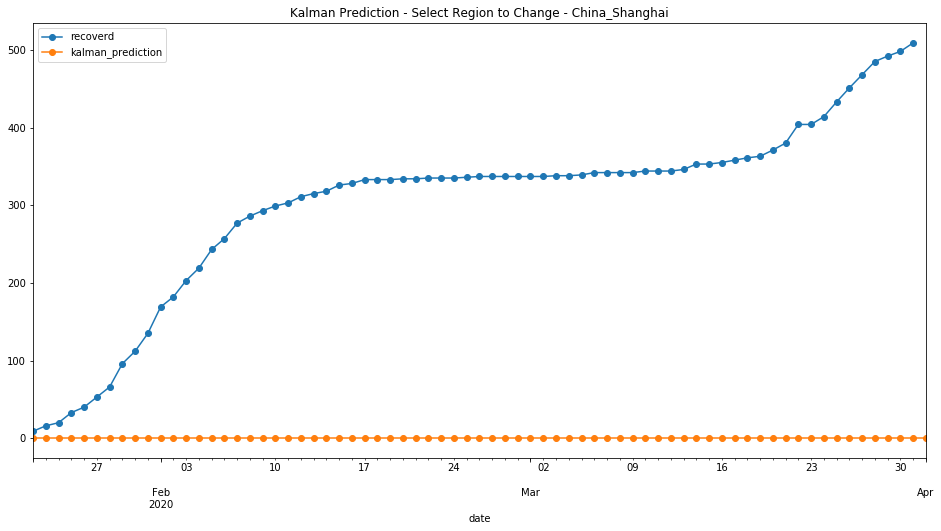

In [32]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='China_Shanghai'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse           mae
148  Italy_nan  1.190759e+09  34507.374199  17301.271429


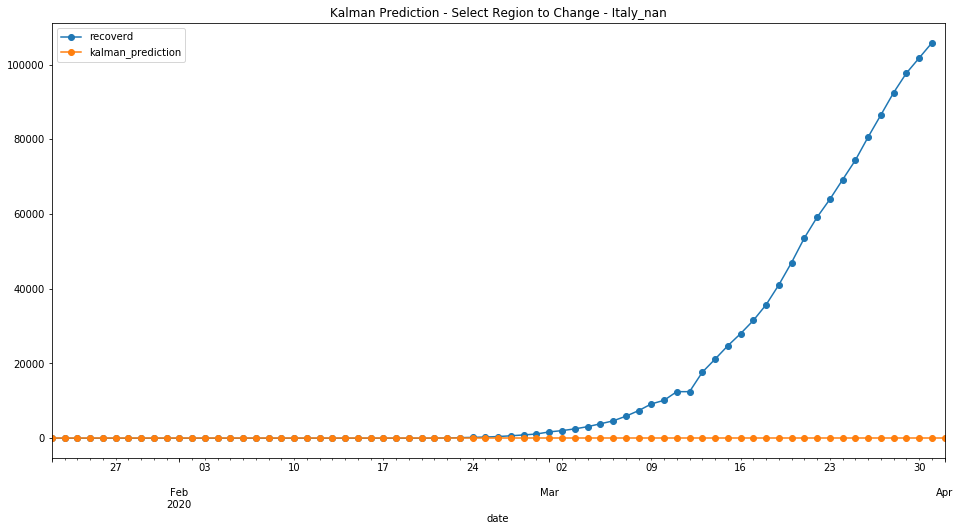

In [33]:
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse           mae
220  Spain_nan  6.348461e+08  25196.152733  10609.957143


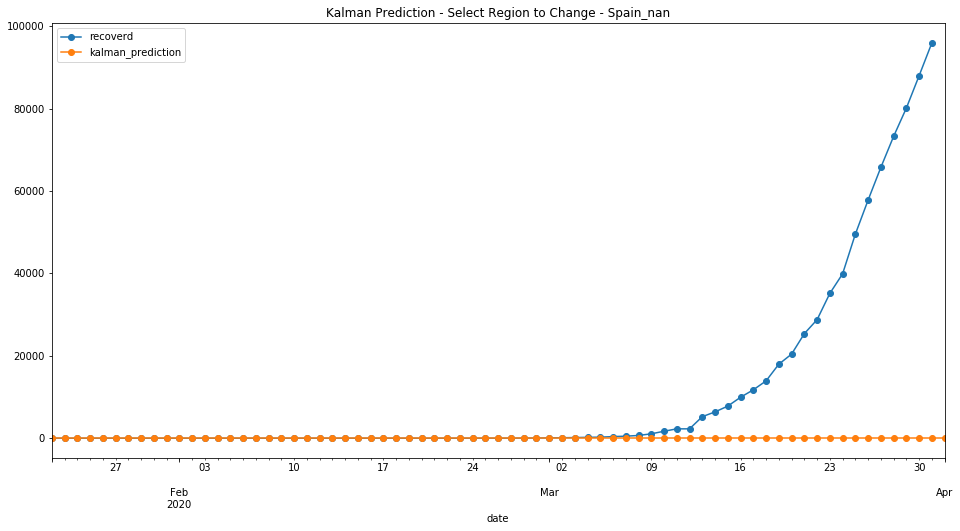

In [34]:
region='Spain_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

                region           mse          rmse      mae
248  United States_nan  1.787982e+09  42284.531907  15528.1


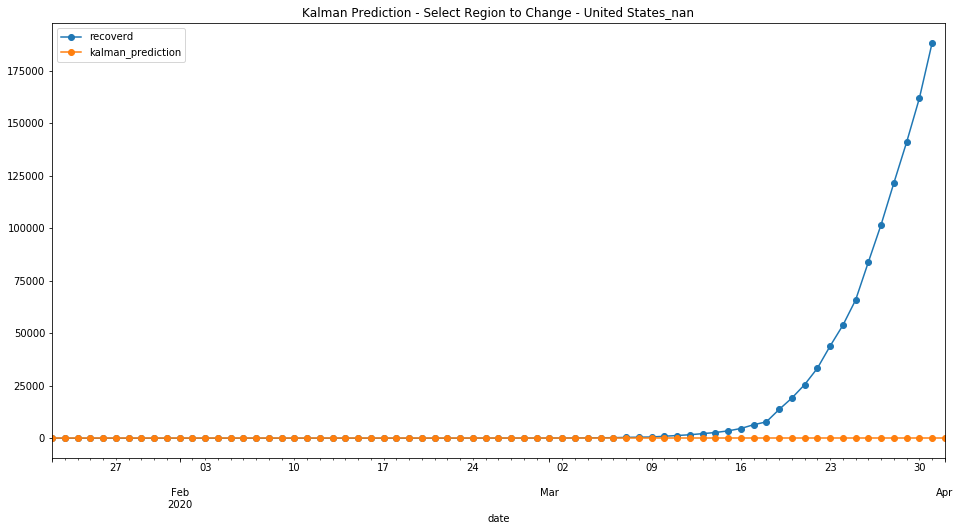

In [35]:
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(ts):i,10])
    pred=np.array(t.iloc[i-len(ts):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse         rmse          mae
247  United Kingdom_nan  3.487547e+07  5905.545886  2339.385714


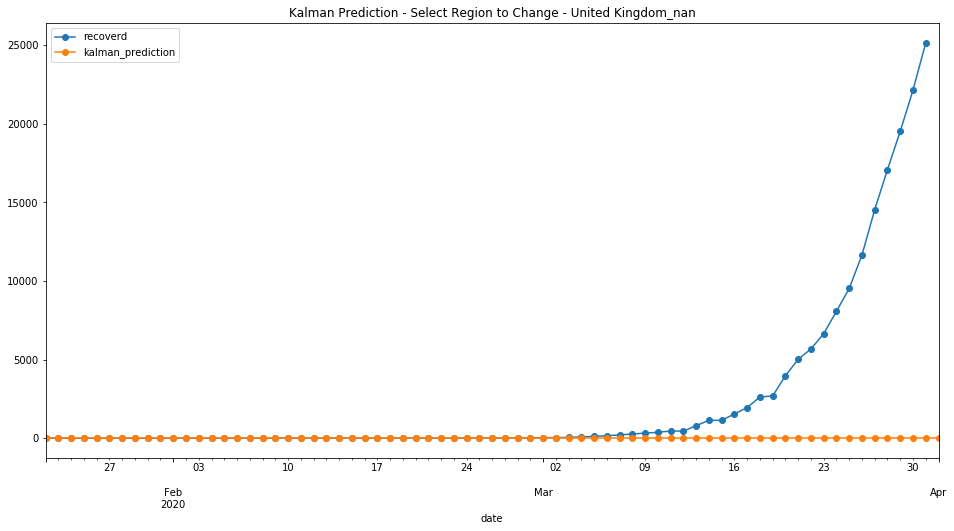

In [36]:
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [37]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='7G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp441_ra9g
  JVM stdout: /tmp/tmp441_ra9g/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp441_ra9g/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/GMT
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,"1 year, 5 months and 5 days !!!"
H2O cluster name:,H2O_from_python_unknownUser_k23e8w
H2O cluster total nodes:,1
H2O cluster free memory:,7 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [38]:
##
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
         'Taiwan*_nan',
         'Turkey_nan' 
      #   'Vietnam_nan',
       ]
#

In [43]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training  progression - When growth happened 2020/03/18 to 2020/03/21
train_df=train[train['date']<'2020-03-24']
boots=train_df[train_df['date']>='2020-03-28'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-03-20']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>='2020-03-24']
test=test[test['date']<'2020-04-01']
test_v2=test[test['region'].isin(region_to_train)]

In [44]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          ]

In [45]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values
pred2.iloc[75:85]

,0,confirmed,date,region
75,1416.0,1405,2020-03-27,Australia_New South Wales
76,1616.0,1617,2020-03-28,Australia_New South Wales
77,1843.0,1791,2020-03-29,Australia_New South Wales
78,2001.0,2032,2020-03-30,Australia_New South Wales
79,2280.0,2032,2020-03-31,Australia_New South Wales
80,8.0,6,2020-03-24,Australia_Northern Territory
81,10.0,6,2020-03-25,Australia_Northern Territory
82,9.0,12,2020-03-26,Australia_Northern Territory
83,21.0,12,2020-03-27,Australia_Northern Territory
84,15.0,15,2020-03-28,Australia_Northern Territory


In [46]:
pred2.iloc[220:240]

,0,confirmed,date,region
220,75.0,74,2020-03-28,Bolivia_nan
221,89.0,81,2020-03-29,Bolivia_nan
222,93.0,97,2020-03-30,Bolivia_nan
223,111.0,107,2020-03-31,Bolivia_nan
224,154.0,166,2020-03-24,Bosnia and Herzegovina_nan
225,195.0,176,2020-03-25,Bosnia and Herzegovina_nan
226,195.0,191,2020-03-26,Bosnia and Herzegovina_nan
227,211.0,237,2020-03-27,Bosnia and Herzegovina_nan
228,268.0,258,2020-03-28,Bosnia and Herzegovina_nan
229,285.0,323,2020-03-29,Bosnia and Herzegovina_nan


In [47]:

train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Italian Model

model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [48]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF

,variable,relative_importance,scaled_importance,percentage
0,last_day,3.989252e+13,1.000000,0.492391
1,region,1.889572e+13,0.473666,0.233229
2,7_day_change,7.394685e+12,0.185365,0.091272
3,3_day_change,5.481294e+12,0.137402,0.067655
4,1_day_change,3.082991e+12,0.077282,0.038053
5,7_day_change_rate,1.817532e+12,0.045561,0.022434
6,3_day_change_rate,1.653739e+12,0.041455,0.020412
7,1_day_change_rate,1.138464e+12,0.028538,0.014052
8,min,8.924599e+11,0.022372,0.011016
9,infected_rate,4.315599e+11,0.010818,0.005327


In [49]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


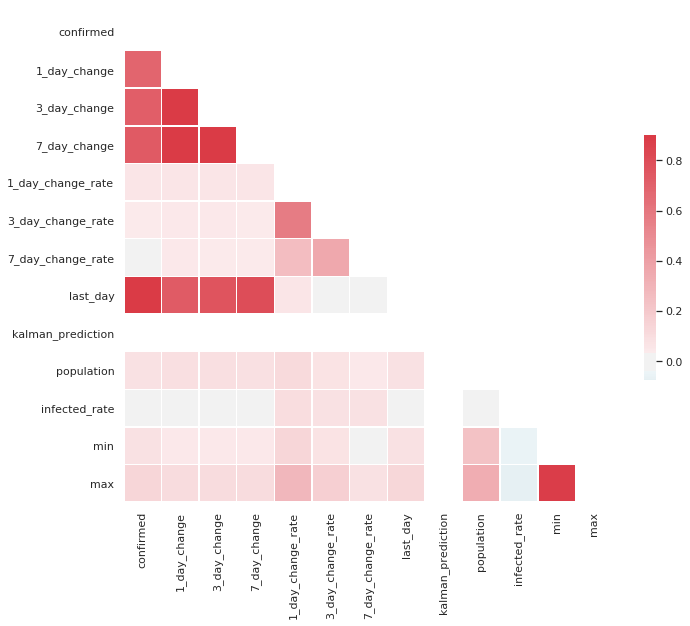

In [50]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [51]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.682568
3_day_change         0.720286
7_day_change         0.737044
1_day_change_rate    0.062383
3_day_change_rate    0.037074
7_day_change_rate    0.023130
last_day             0.925920
kalman_prediction         NaN
population           0.081186
infected_rate        0.005855
min                  0.078987
max                  0.136848
Name: confirmed, dtype: float64


Text(0.5, 1.0, 'Daily Min/Max Temperature - Italy')

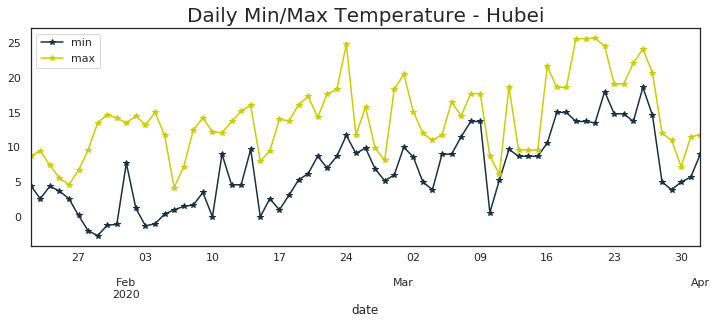

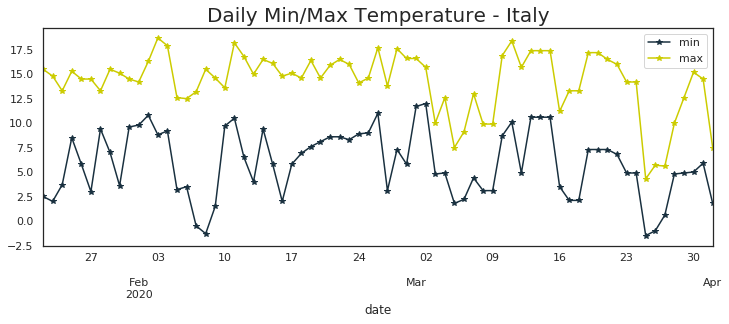

In [52]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')

p=p[p['region']=='China_Hubei']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Hubei',fontdict={'fontsize': 20})

## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
p=train[['date','region','min','max']].set_index('date')
p=p[p['region']=='Italy_nan']
p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - Italy',fontdict={'fontsize': 20})
#
#

In [53]:
avg_temp=train[['region','confirmed','min','max']]  # from 17-02-20 to 16-03-2020
avg_temp=avg_temp.groupby(by='region').mean()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                                min        max
region                                        
China_Hubei                6.700000  14.157746
Italy_nan                  5.876056  14.257746
United States_nan          2.683099   7.938028
Spain_nan                  6.470423  15.412676
Germany_nan                1.343662   8.432394
Iran_nan                   7.887324  15.485915
France_nan                 2.457746  11.859155
Korea, South_nan          -0.012676  10.100000
United Kingdom_nan         0.983099   6.884507
Switzerland_nan           -2.032394   1.892958
Netherlands_nan            1.856338   4.791549
Belgium_nan                3.742254   9.840845
Austria_nan               -3.026761   1.159155
China_Guangdong           15.090141  23.271831
China_Henan                3.525352  13.284507
China_Zhejiang             7.253521  13.040845
Turkey_nan                 0.398592   5.714085
China_Hunan                7.156338  12.328169
China_Anhui             

### Kalman X Days Ahead Prediction

In [54]:
%%R

#install.packages('reshape')

NULL


In [55]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/ts_2_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
#####for (i in 1:45) { # Set i days prediction
for (i in 1:75) { # Set i days prediction    
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [56]:
all_new=%R all_new

In [57]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

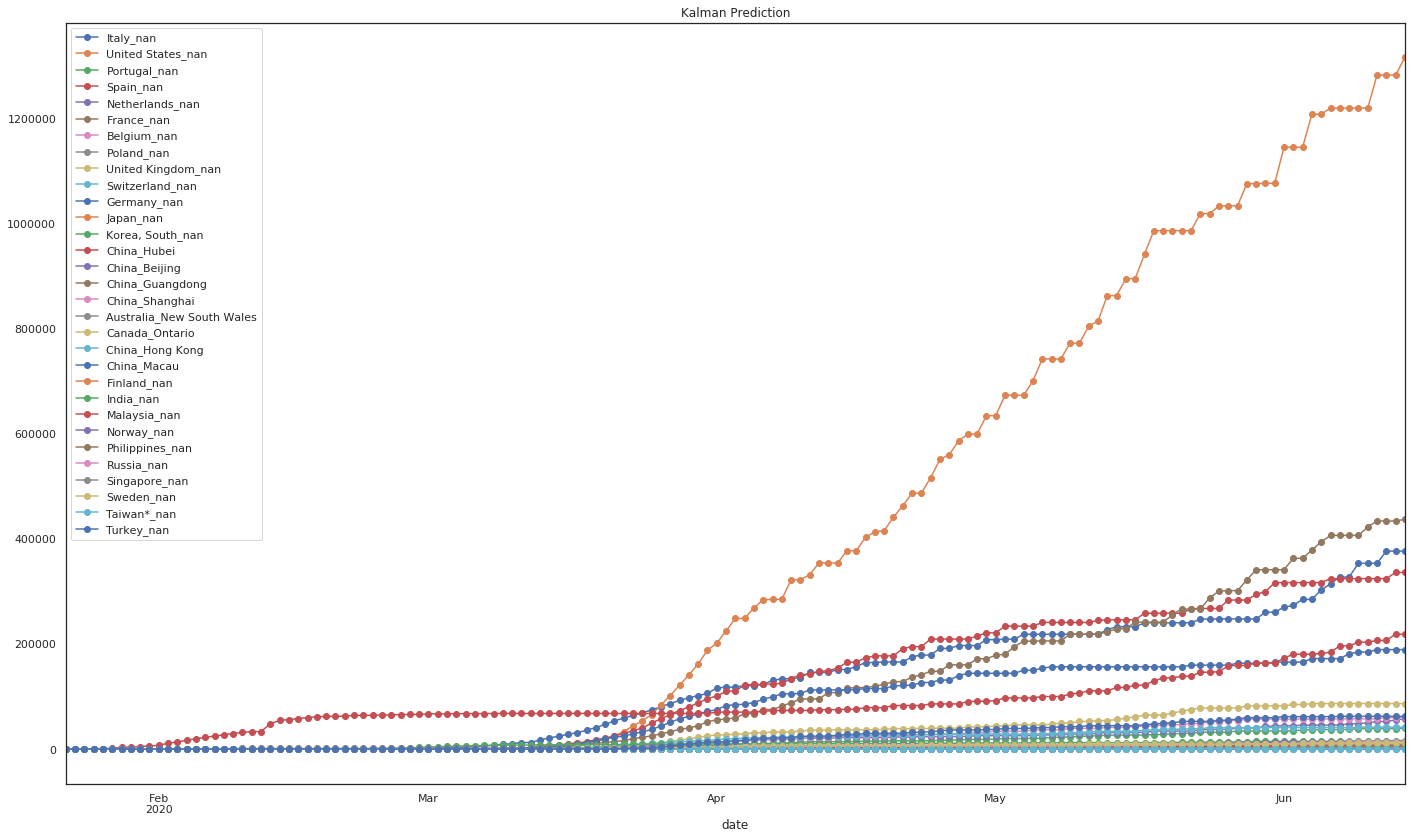

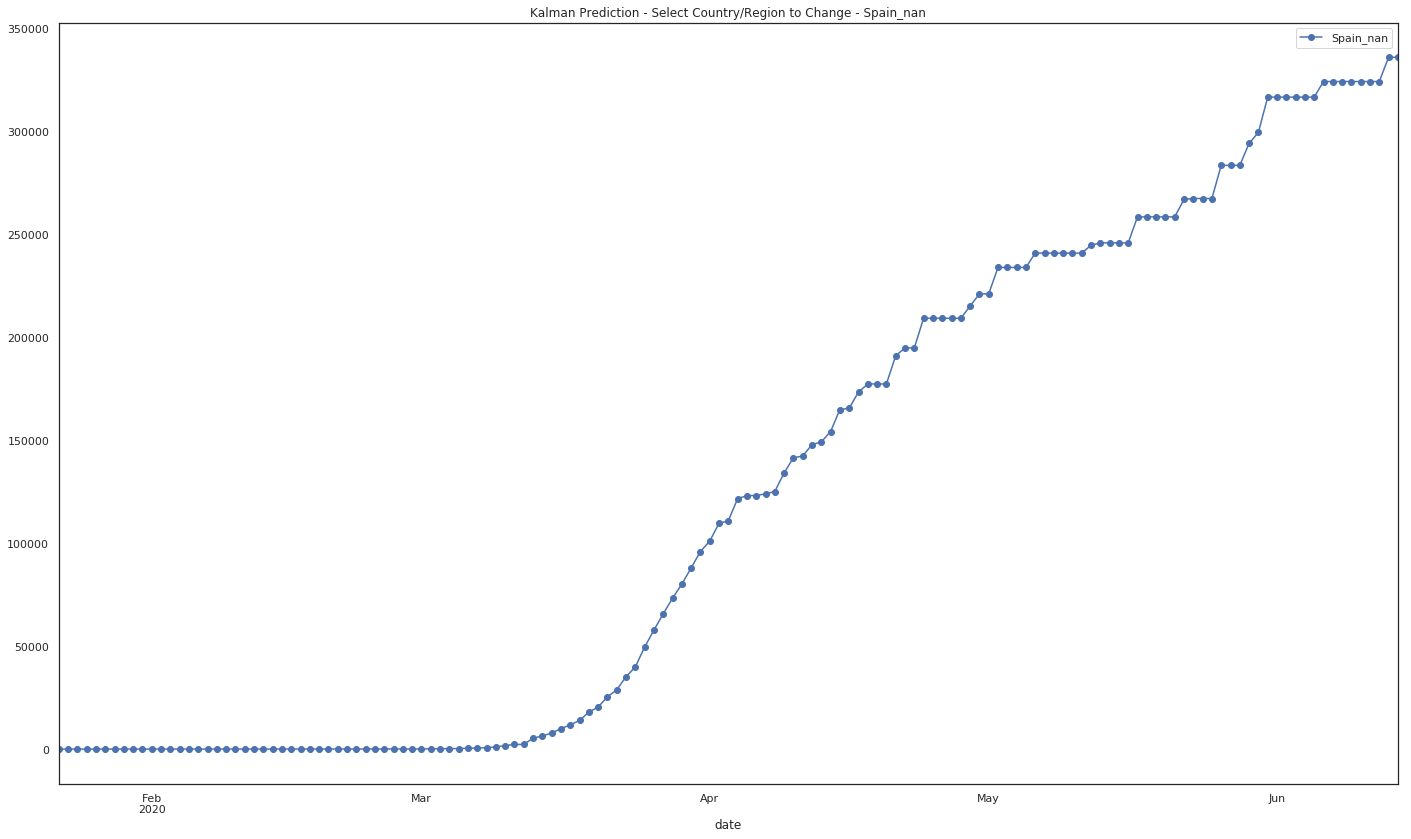

In [58]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
#p_kalman2=all_new[['date','China_Hubei']]
p_kalman2=all_new[['date','Spain_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


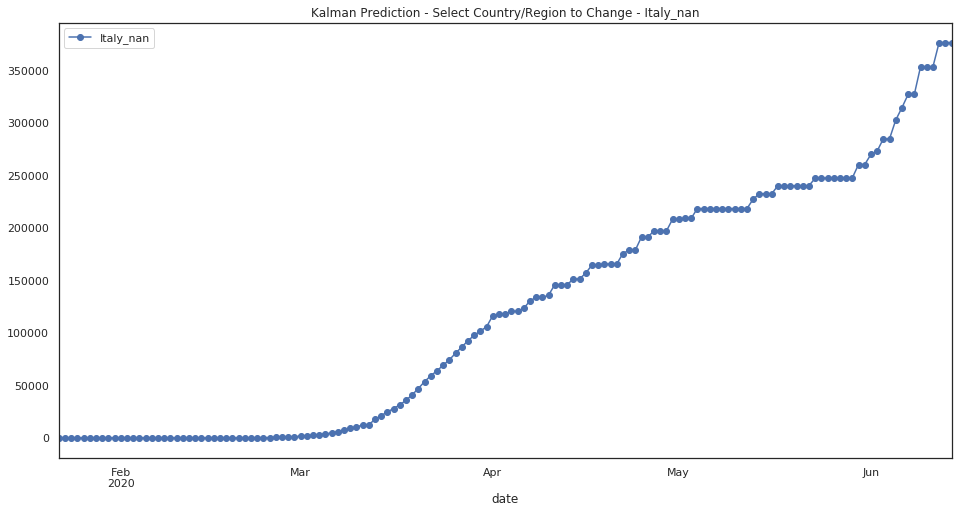

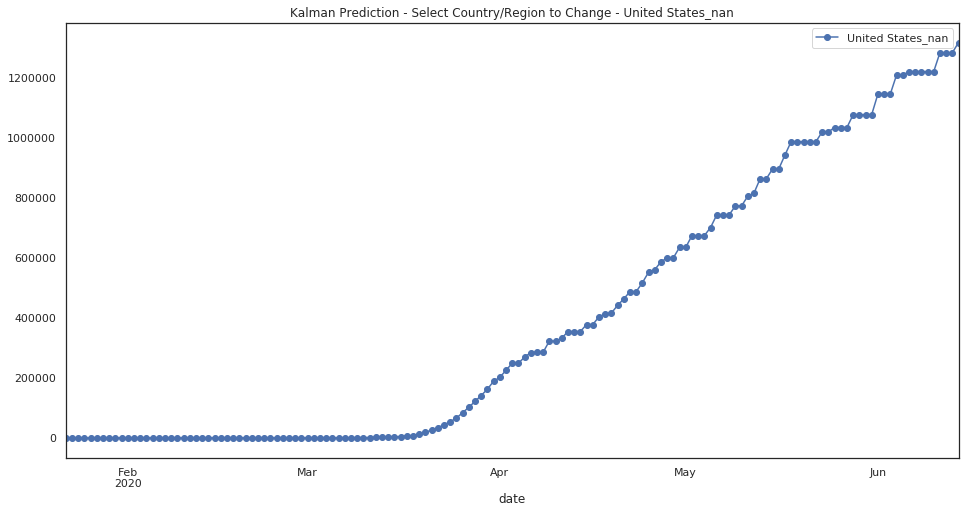

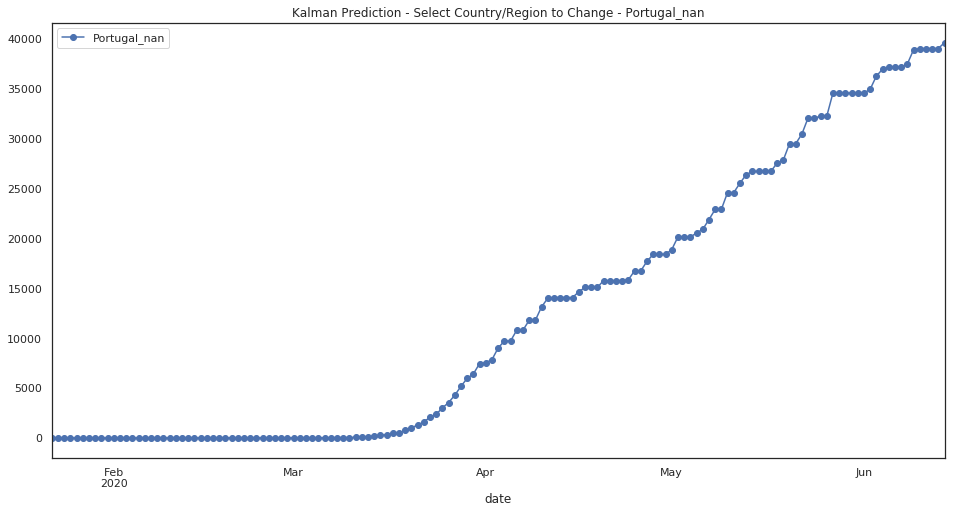

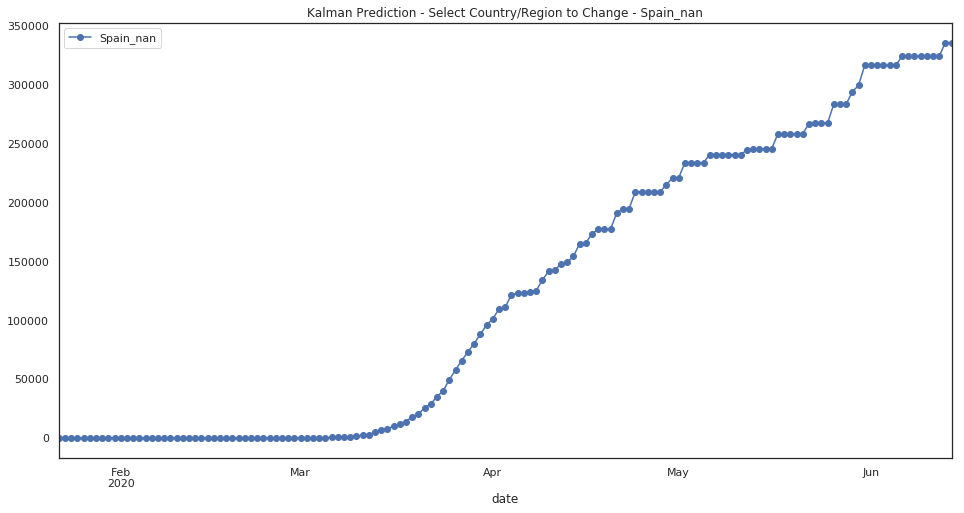

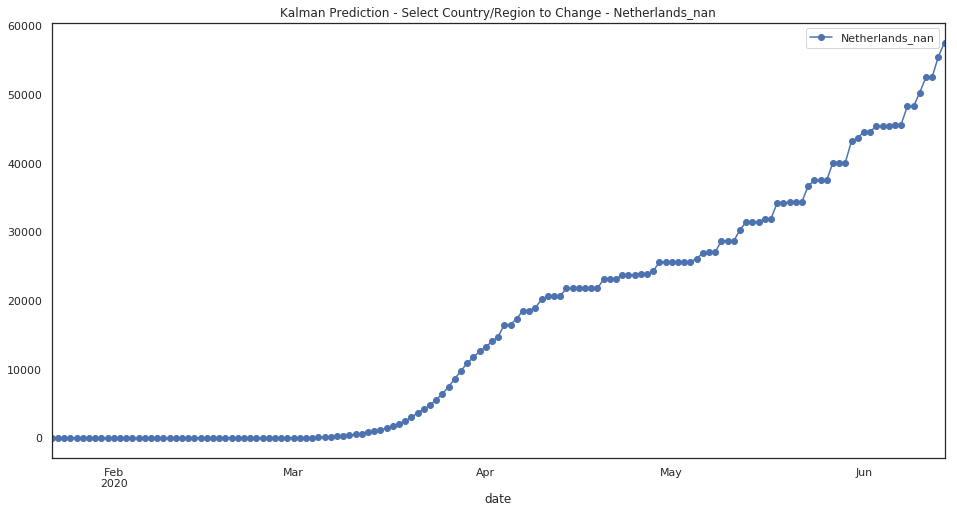

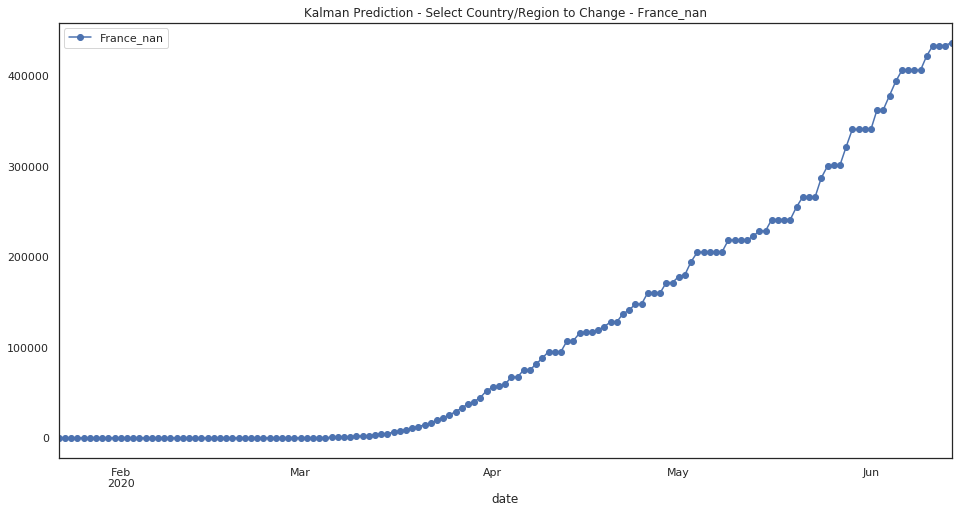

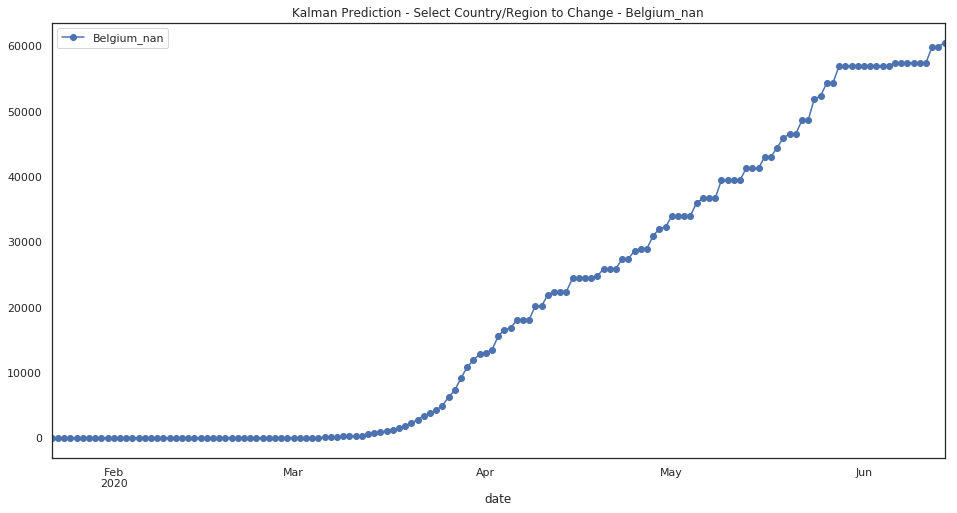

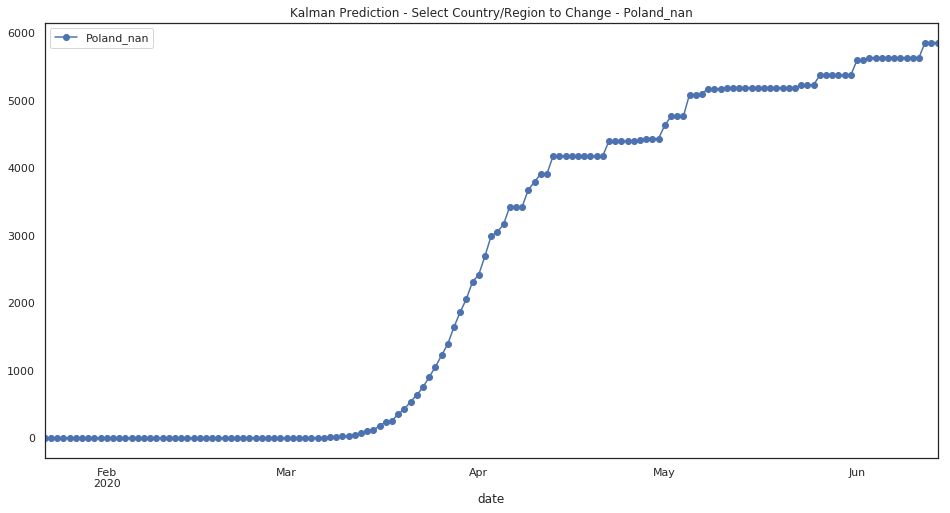

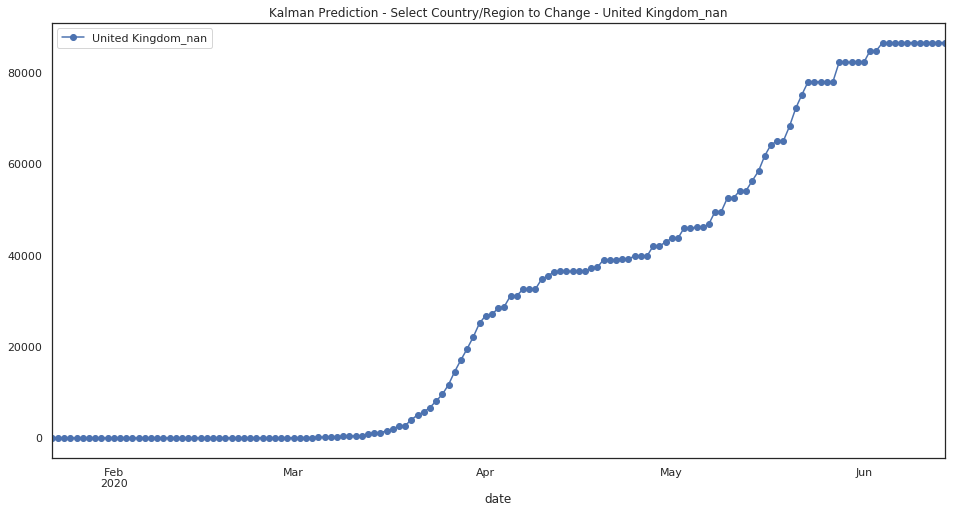

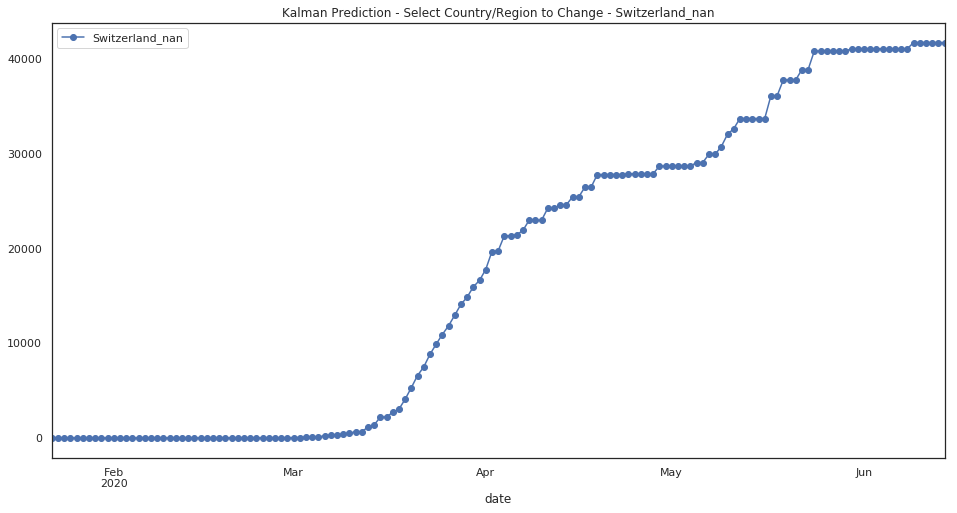

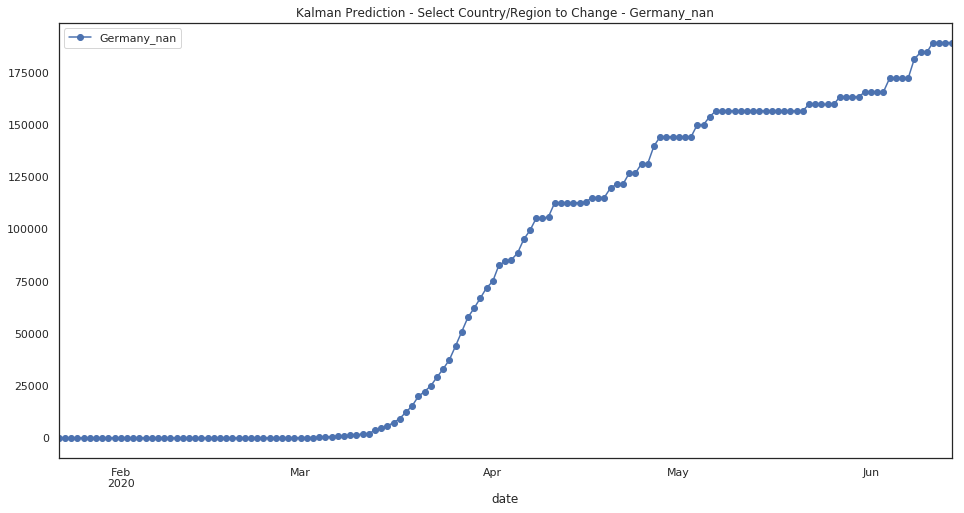

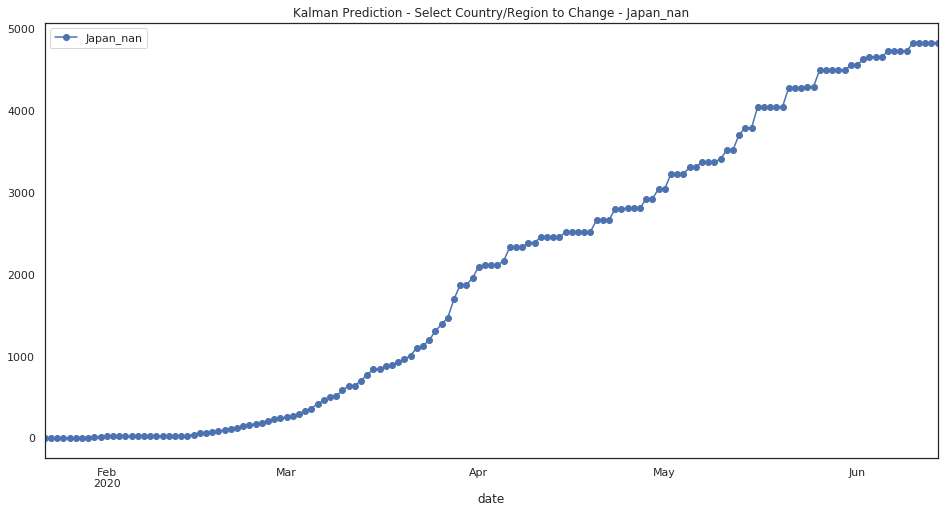

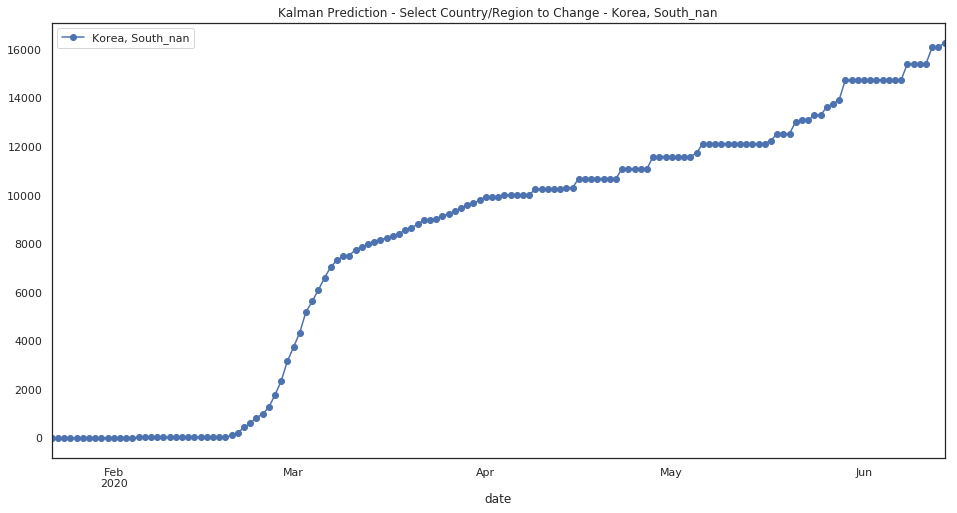

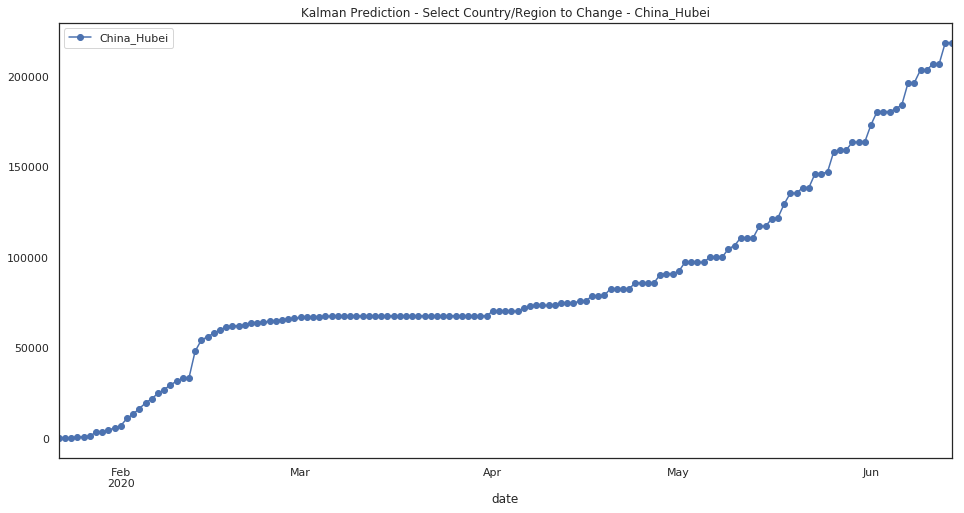

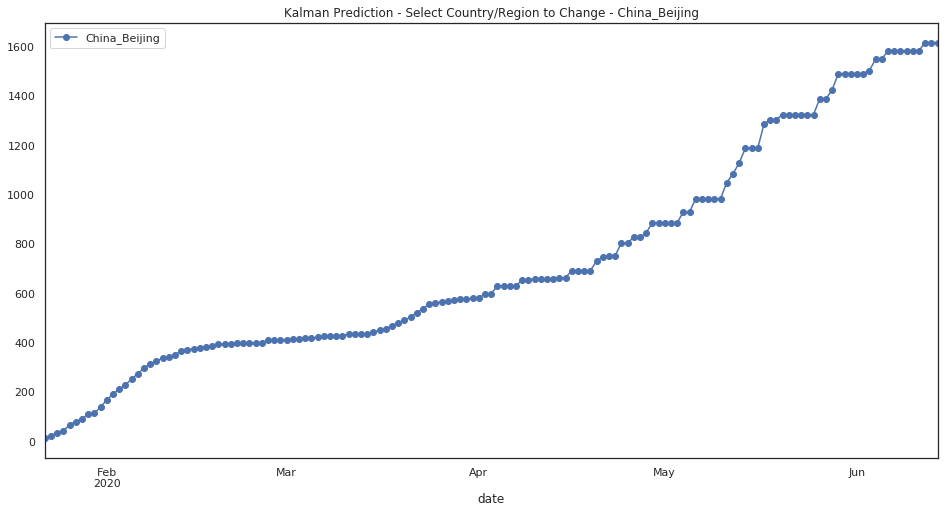

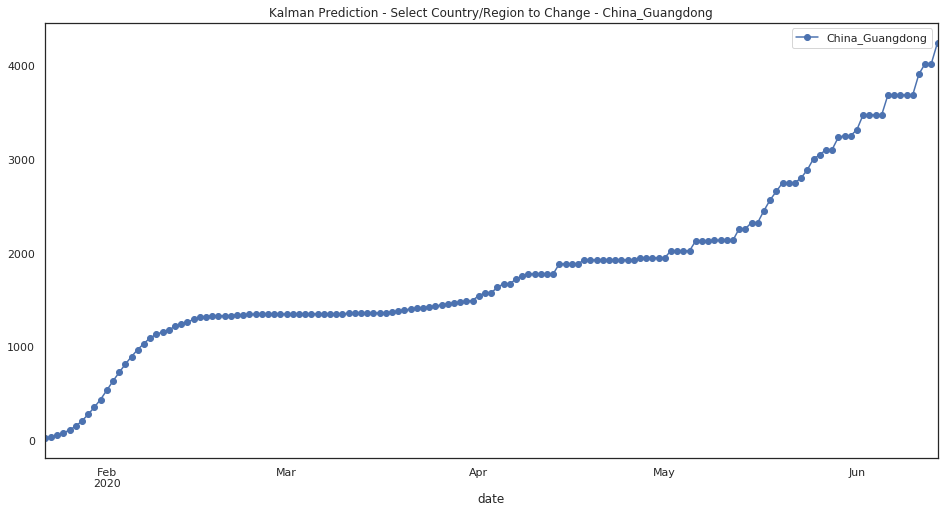

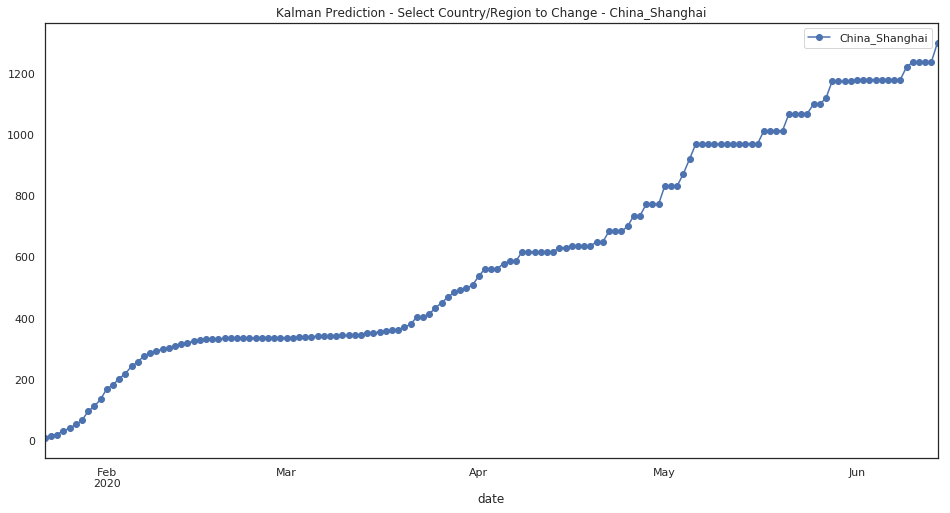

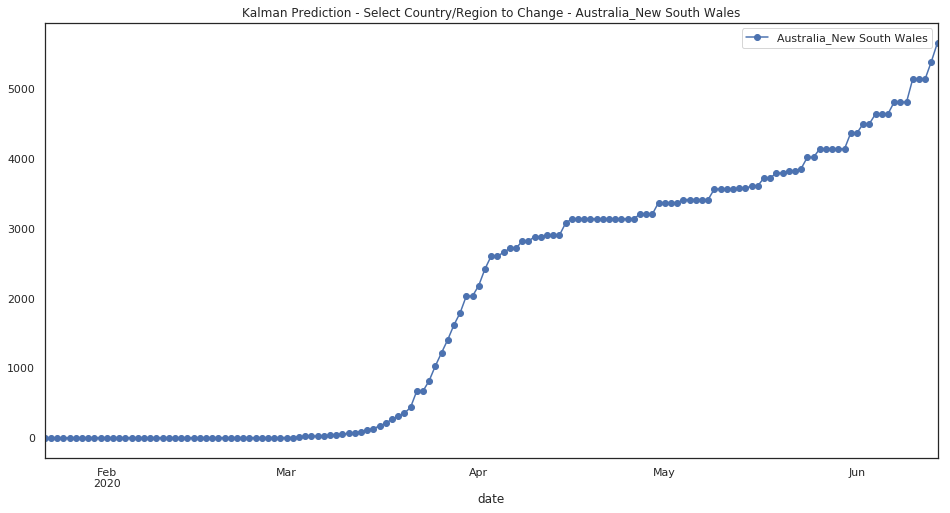

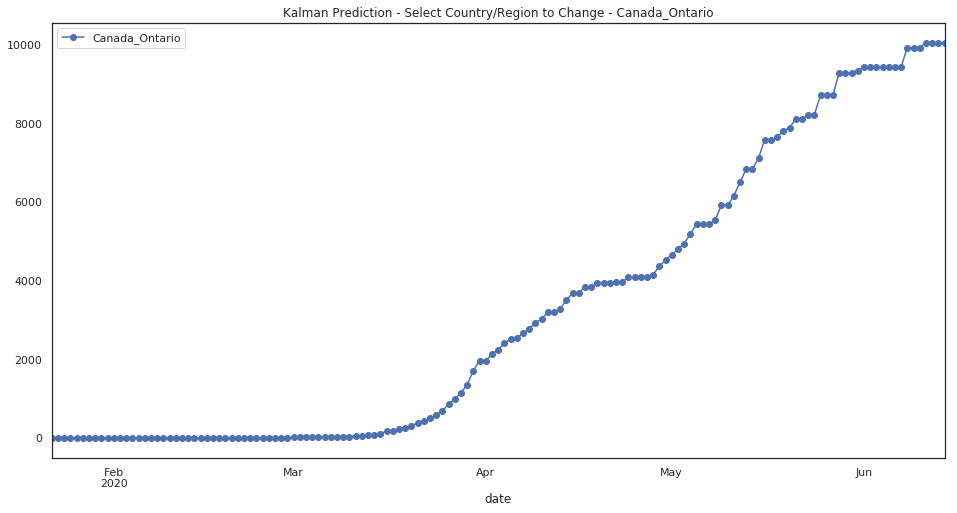

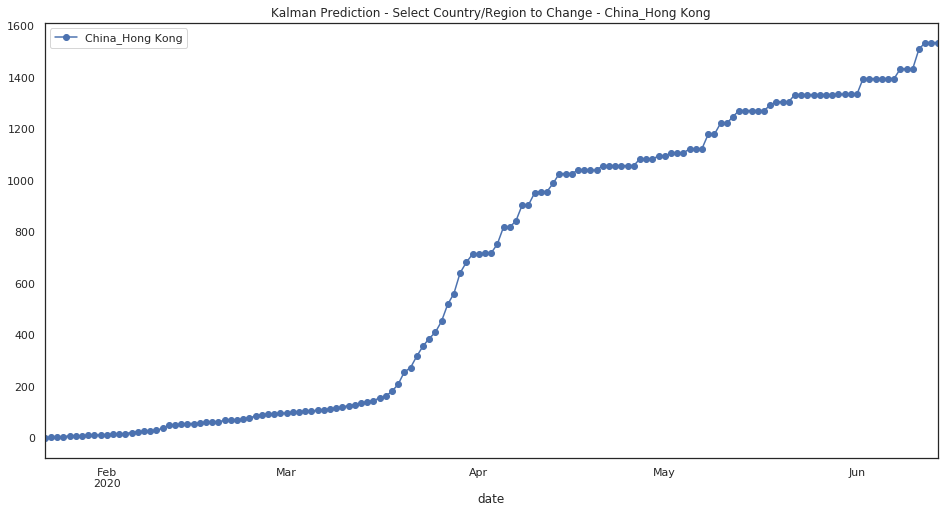

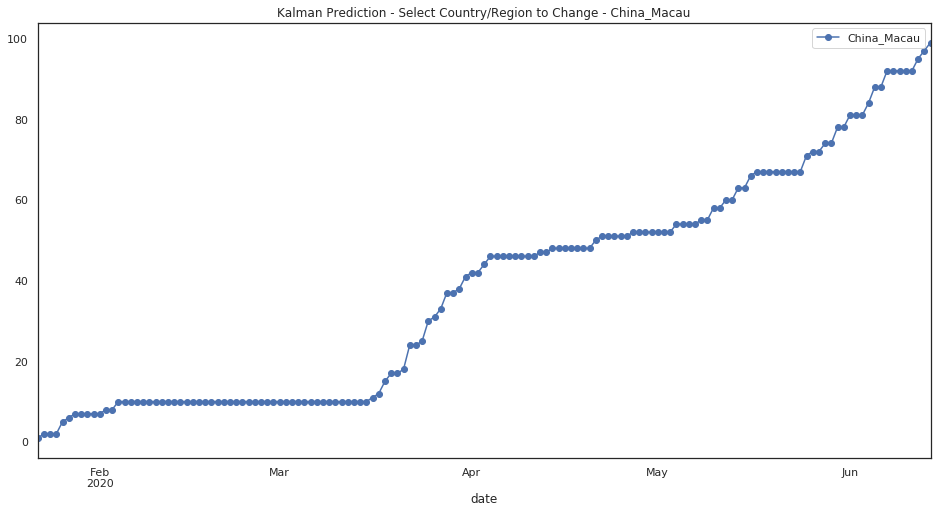

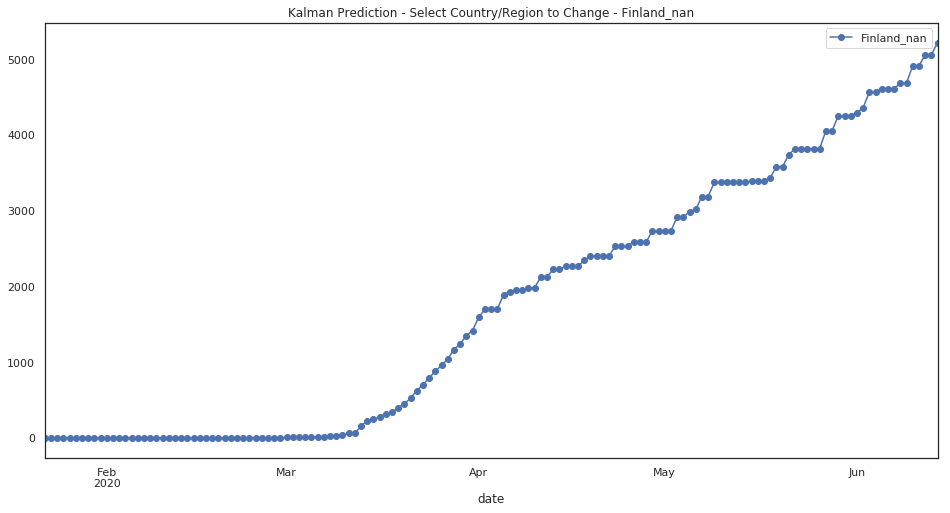

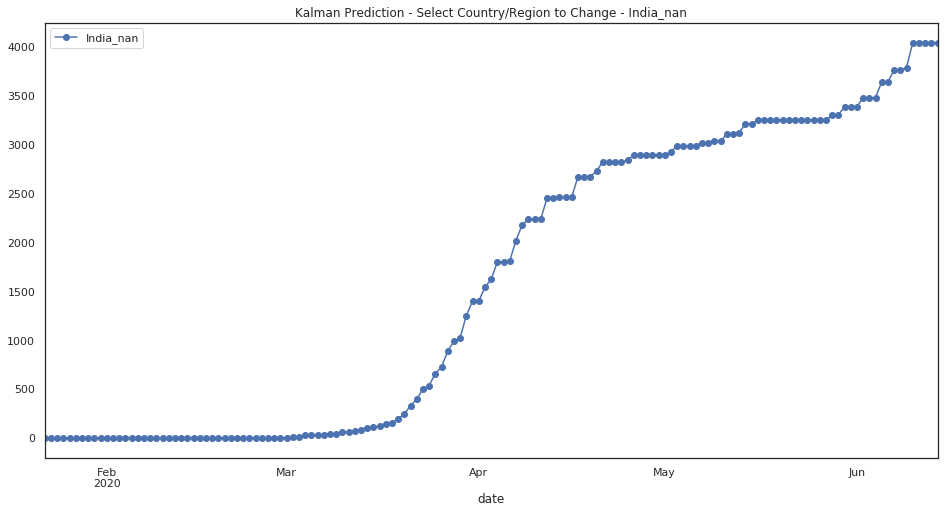

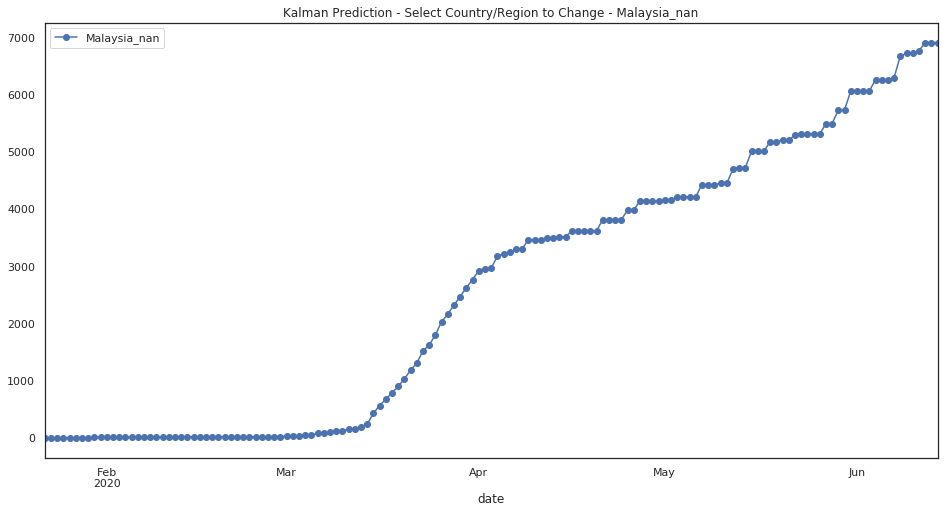

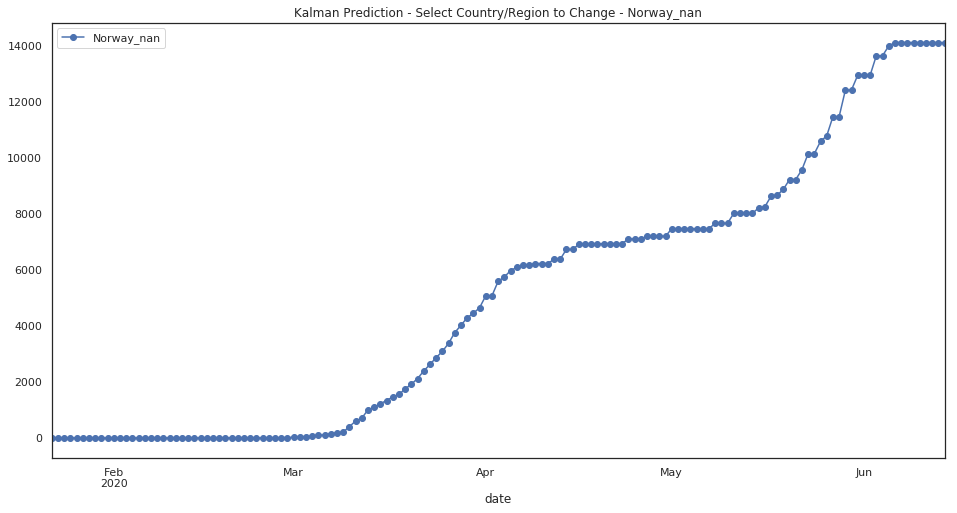

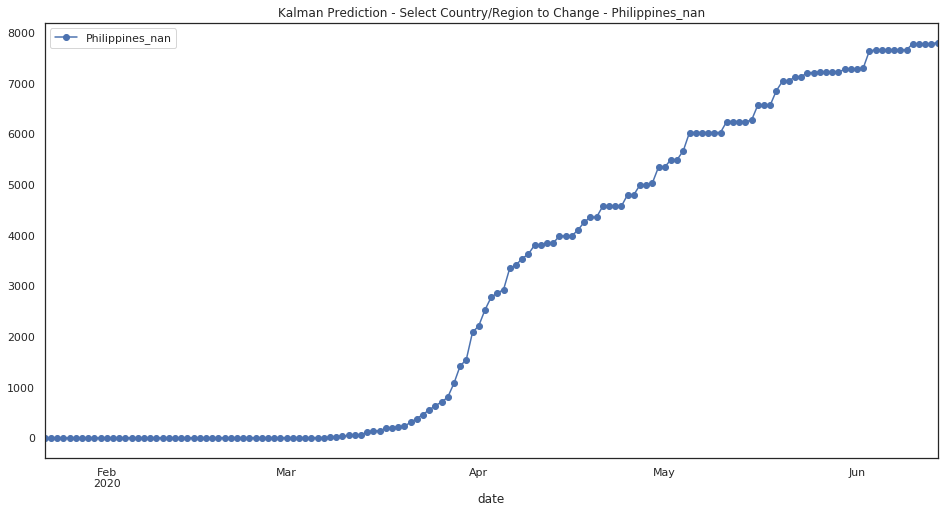

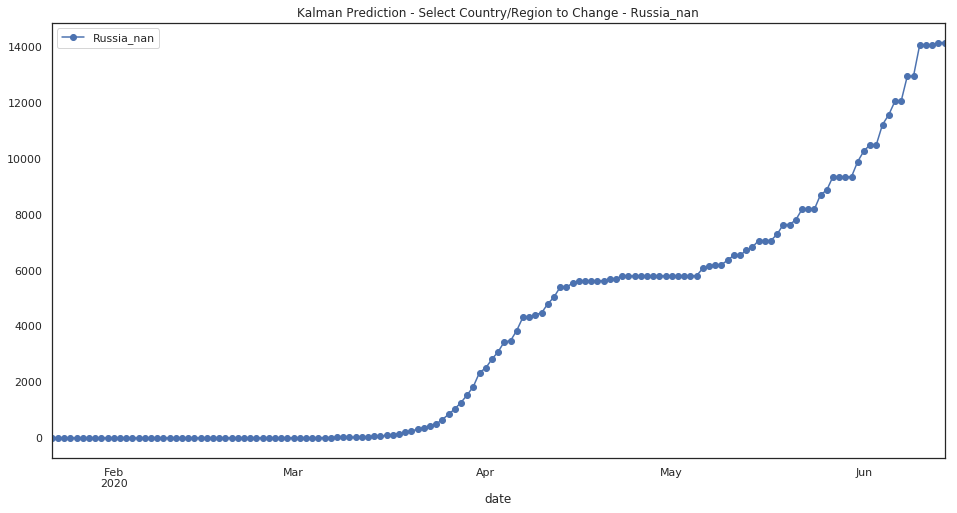

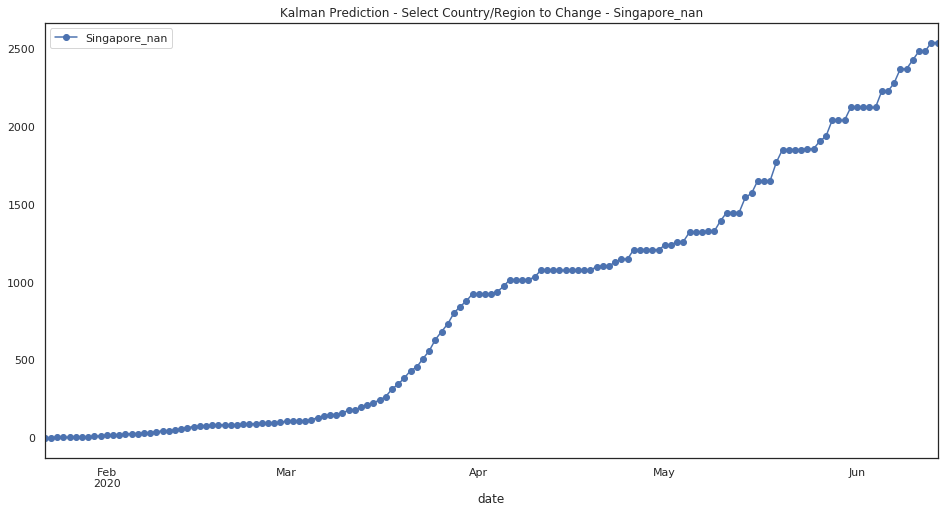

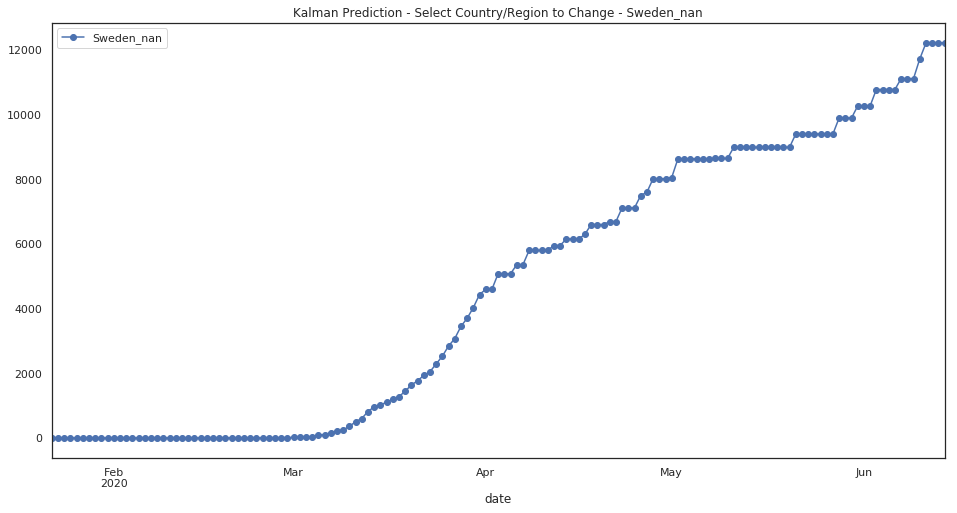

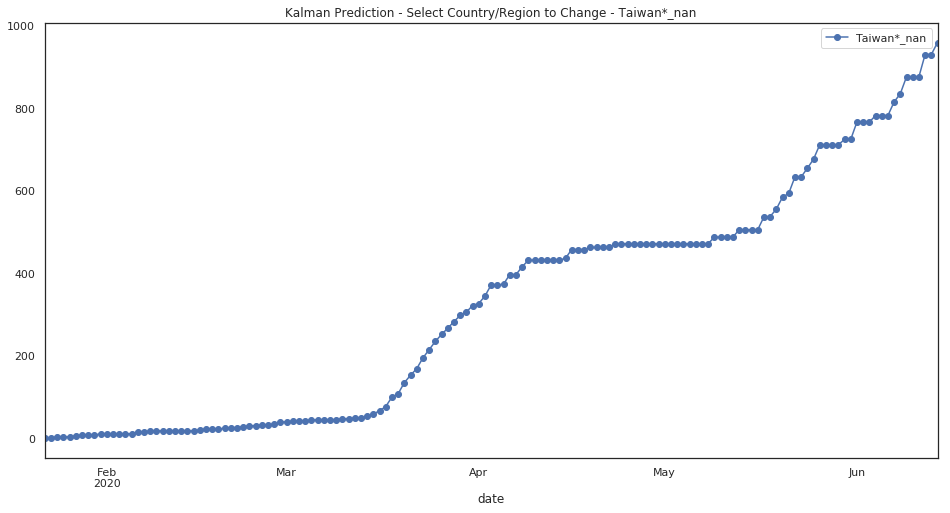

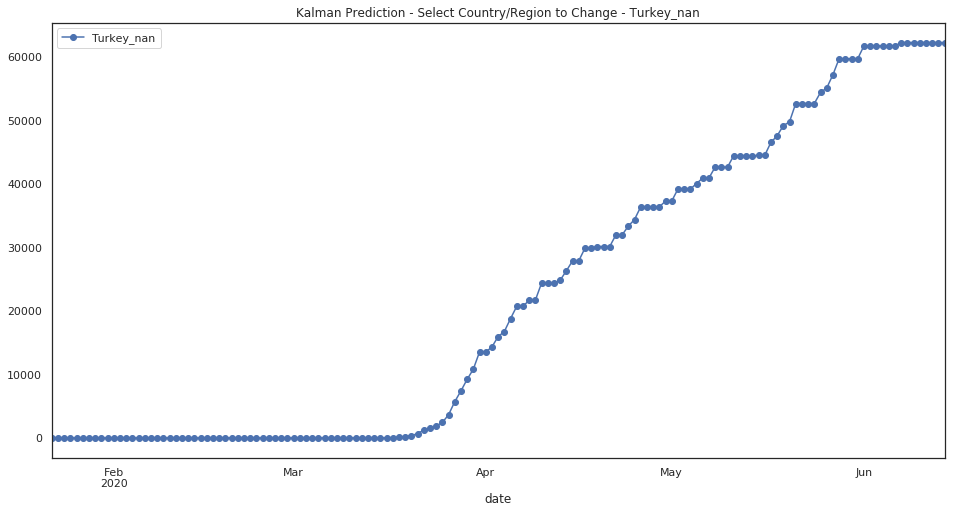

In [59]:
### Joao - Dynamic print
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [60]:
t.to_csv(r't_confirmed_global.csv', index = False, header=True)

In [61]:
all_new.to_csv(r'prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [62]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-2,2]-1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-4,2]-1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-8,2]-1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(1)
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =(test_iter['last_day']+1)/(test_iter['population']+1)*10000
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [63]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction,population,infected_rate,min,max


In [64]:
test_iter[36220:36250]

,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction,population,infected_rate,min,max
33610,2020-06-11,United Kingdom_Channel Islands,387.0,0.0,5.0,7.0,100.258398,101.570681,102.105263,387.0,387.0,1,1940000.0,0.0,0.0
33611,2020-06-12,United Kingdom_Channel Islands,395.0,0.0,0.0,5.0,100.258398,100.258398,101.570681,387.0,395.0,1,1940000.0,0.0,0.0
33612,2020-06-13,United Kingdom_Channel Islands,395.0,8.0,8.0,13.0,102.325581,102.325581,103.664921,395.0,395.0,1,1980000.0,0.0,0.0
33613,2020-06-14,United Kingdom_Channel Islands,403.0,0.0,8.0,13.0,100.253165,102.325581,103.664921,395.0,403.0,1,1980000.0,0.0,0.0
33614,2020-06-15,United Kingdom_Channel Islands,0.0,8.0,16.0,21.0,102.278481,104.392765,105.759162,403.0,0.0,1,2020000.0,0.0,0.0
33615,2020-01-22,United Kingdom_Gibraltar,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1,5000.0,0.0,0.0
33616,2020-01-23,United Kingdom_Gibraltar,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1,5000.0,0.0,0.0
33617,2020-01-24,United Kingdom_Gibraltar,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1,5000.0,0.0,0.0
33618,2020-01-25,United Kingdom_Gibraltar,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1,5000.0,0.0,0.0
33619,2020-01-26,United Kingdom_Gibraltar,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1,5000.0,0.0,0.0


In [65]:
test_iter[34860:34890]

,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction,population,infected_rate,min,max
32292,2020-05-05,Tunisia_nan,1262.0,58.0,149.0,245.0,104.900332,113.477089,124.188791,1262.0,1262.0,1,6315000.0,0.0,0.0
32293,2020-05-06,Tunisia_nan,1268.0,0.0,149.0,203.0,100.079239,113.477089,119.263456,1262.0,1268.0,1,6315000.0,0.0,0.0
32294,2020-05-07,Tunisia_nan,1290.0,6.0,64.0,155.0,100.554675,105.398671,114.016173,1268.0,1290.0,1,6345000.0,0.0,0.0
32295,2020-05-08,Tunisia_nan,1319.0,22.0,28.0,177.0,101.813880,102.297940,115.992812,1290.0,1319.0,1,6455000.0,0.0,0.0
32296,2020-05-09,Tunisia_nan,1322.0,29.0,57.0,206.0,102.325581,104.595880,118.598383,1319.0,1322.0,1,6600000.0,0.0,0.0
32297,2020-05-10,Tunisia_nan,1322.0,3.0,54.0,209.0,100.303260,104.337539,118.867925,1322.0,1322.0,1,6615000.0,0.0,0.0
32298,2020-05-11,Tunisia_nan,1322.0,0.0,32.0,118.0,100.075643,102.558140,109.883721,1322.0,1322.0,1,6615000.0,0.0,0.0
32299,2020-05-12,Tunisia_nan,1338.0,0.0,3.0,60.0,100.075643,100.303260,104.833597,1322.0,1338.0,1,6615000.0,0.0,0.0
32300,2020-05-13,Tunisia_nan,1338.0,16.0,16.0,76.0,101.285930,101.285930,106.101426,1338.0,1338.0,1,6695000.0,0.0,0.0
32301,2020-05-14,Tunisia_nan,1338.0,0.0,16.0,70.0,100.074738,101.285930,105.599369,1338.0,1338.0,1,6695000.0,0.0,0.0


In [66]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [67]:
pred[65:]

region,Afghanistan_nan,Albania_nan,Algeria_nan,Andorra_nan,Angola_nan,Antigua and Barbuda_nan,Argentina_nan,Armenia_nan,Australia_Australian Capital Territory,Australia_New South Wales,...,United Kingdom_Turks and Caicos Islands,United Kingdom_nan,United States_nan,Uruguay_nan,Uzbekistan_nan,Venezuela_nan,Vietnam_nan,West Bank and Gaza_nan,Zambia_nan,Zimbabwe_nan
date,,,,,,,,,,,,,,,,,,,,,
2020-03-27,122.0,174.0,431.0,224.0,4.0,7.0,502.0,290.0,53.0,1258.0,...,0.0,13356.0,98678.0,217.0,75.0,107.0,175.0,84.0,16.0,3.0
2020-03-28,137.0,186.0,469.0,267.0,4.0,7.0,589.0,329.0,62.0,1433.0,...,0.0,16722.0,118367.0,238.0,88.0,107.0,184.0,91.0,22.0,5.0
2020-03-29,131.0,197.0,515.0,308.0,5.0,7.0,690.0,407.0,71.0,1631.0,...,4.0,19406.0,140652.0,274.0,104.0,119.0,197.0,98.0,28.0,7.0
2020-03-30,143.0,212.0,572.0,334.0,7.0,7.0,745.0,424.0,77.0,1791.0,...,4.0,21914.0,160695.0,304.0,144.0,119.0,211.0,109.0,29.0,7.0
2020-03-31,211.0,223.0,655.0,370.0,7.0,7.0,820.0,482.0,78.0,2032.0,...,5.0,24578.0,182971.0,310.0,149.0,135.0,228.0,116.0,35.0,7.0
2020-04-01,202.0,243.0,819.0,376.0,7.0,7.0,1054.0,532.0,80.0,2032.0,...,5.0,27799.0,212598.0,338.0,172.0,135.0,235.0,119.0,35.0,8.0
2020-04-02,216.0,252.0,800.0,393.0,8.0,8.0,1054.0,578.0,93.0,2181.0,...,6.0,28960.0,221219.0,362.0,193.0,135.0,237.0,131.0,43.0,8.0
2020-04-03,227.0,257.0,897.0,419.0,9.0,8.0,1172.0,578.0,94.0,2418.0,...,7.0,28315.0,247633.0,398.0,193.0,152.0,234.0,145.0,47.0,9.0
2020-04-04,260.0,257.0,859.0,466.0,10.0,9.0,1321.0,595.0,101.0,2603.0,...,7.0,29600.0,271387.0,398.0,210.0,152.0,254.0,146.0,50.0,9.0


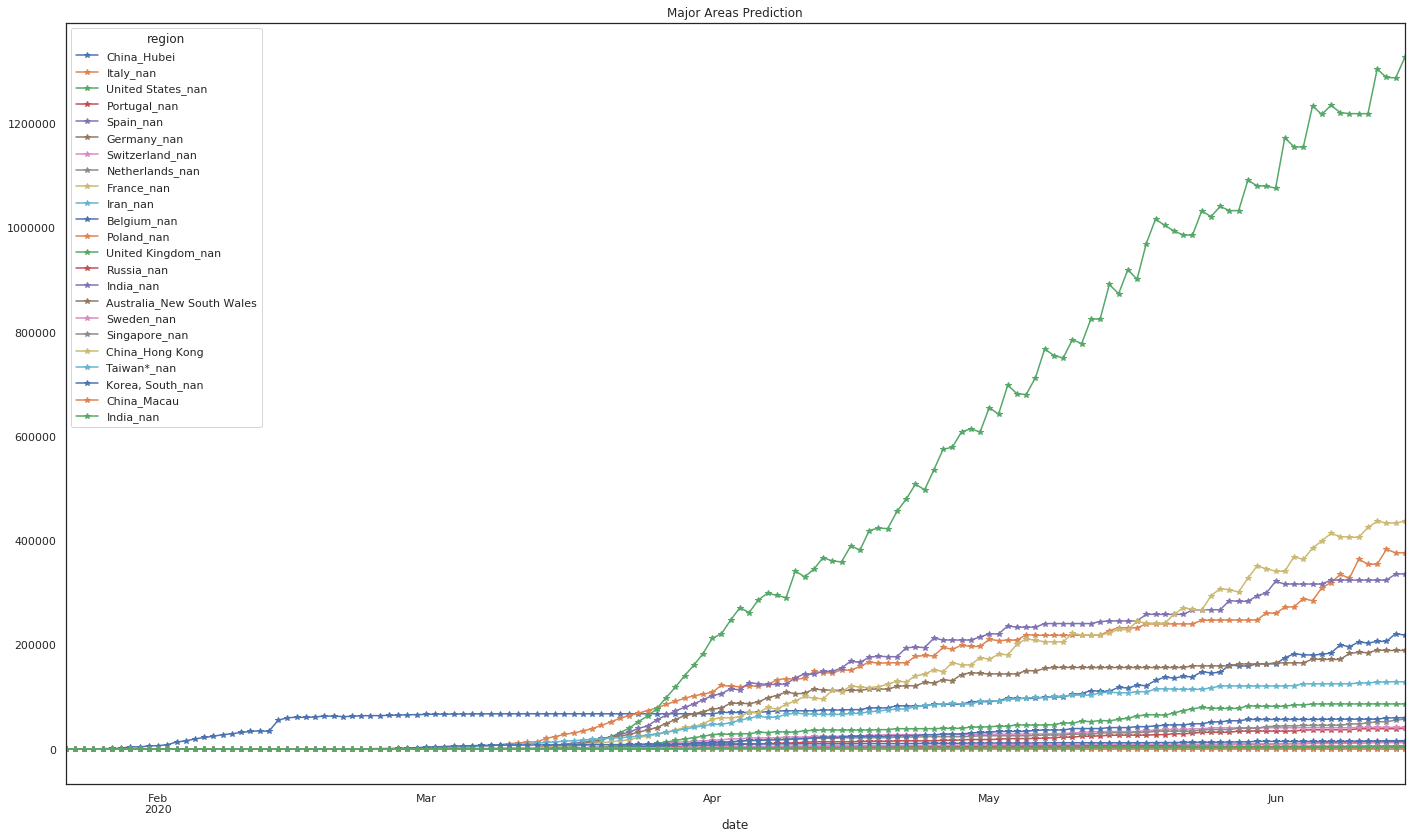

In [68]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
        'United States_nan',
        'Portugal_nan', 'Spain_nan',
        'Germany_nan', 'Switzerland_nan', 
        'Netherlands_nan',
        'France_nan',
        'Iran_nan',
        'Belgium_nan', 'Poland_nan',
        'United Kingdom_nan', 
        'Russia_nan', 'India_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Korea, South_nan',
        'China_Macau',
        'India_nan',
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p.plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

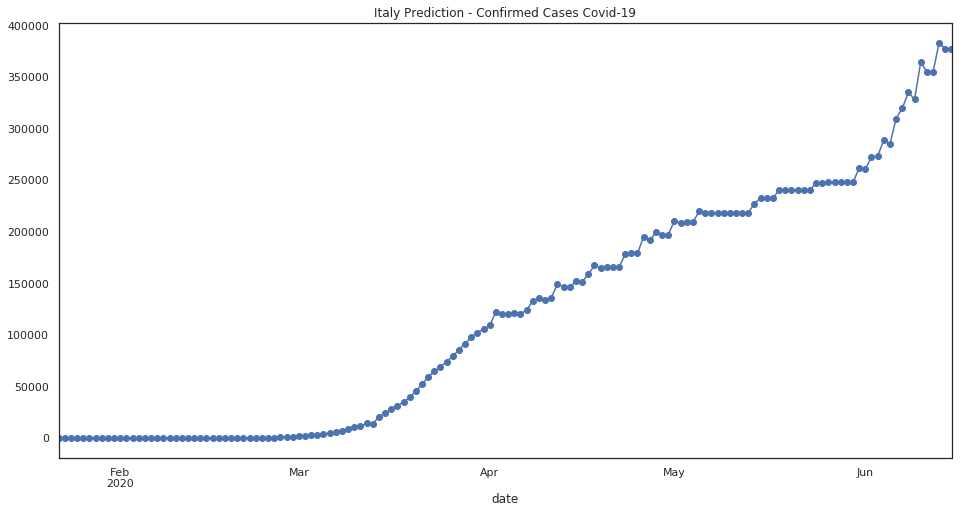

In [69]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2.plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

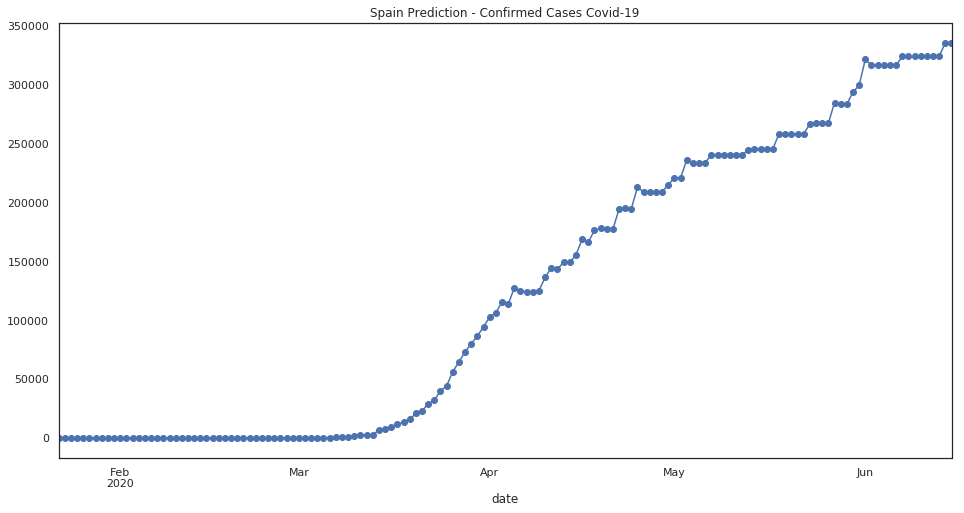

In [70]:
p3=pred['Spain_nan']
p3.plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

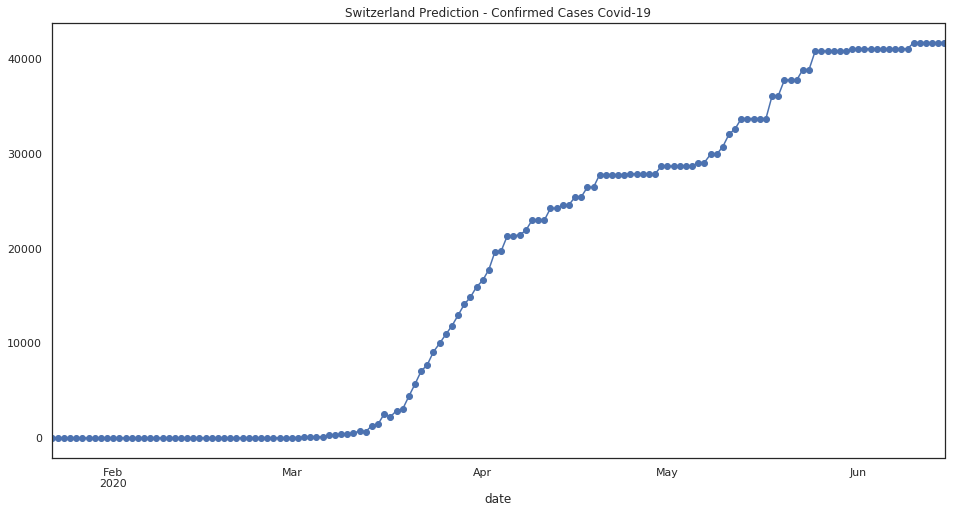

In [71]:
p4=pred['Switzerland_nan']
p4.plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

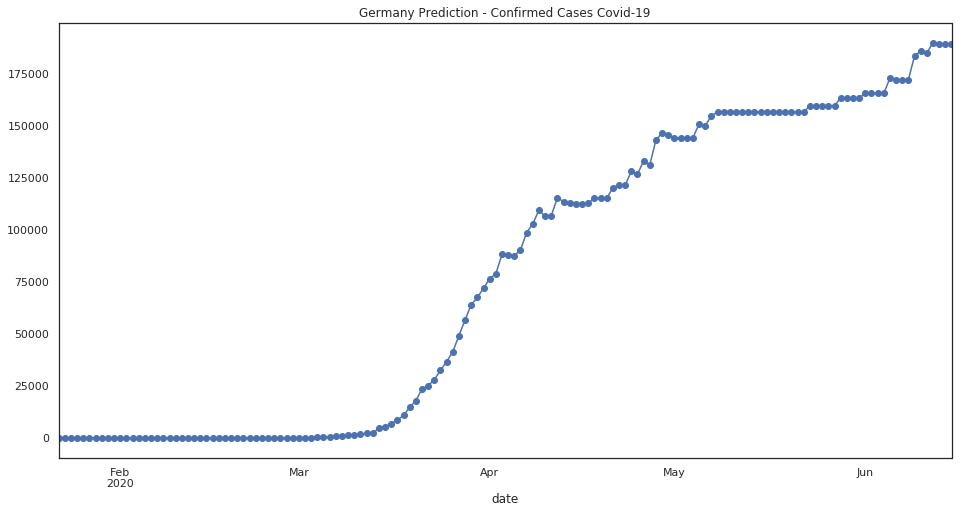

In [72]:
p5=pred['Germany_nan']
p5.plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

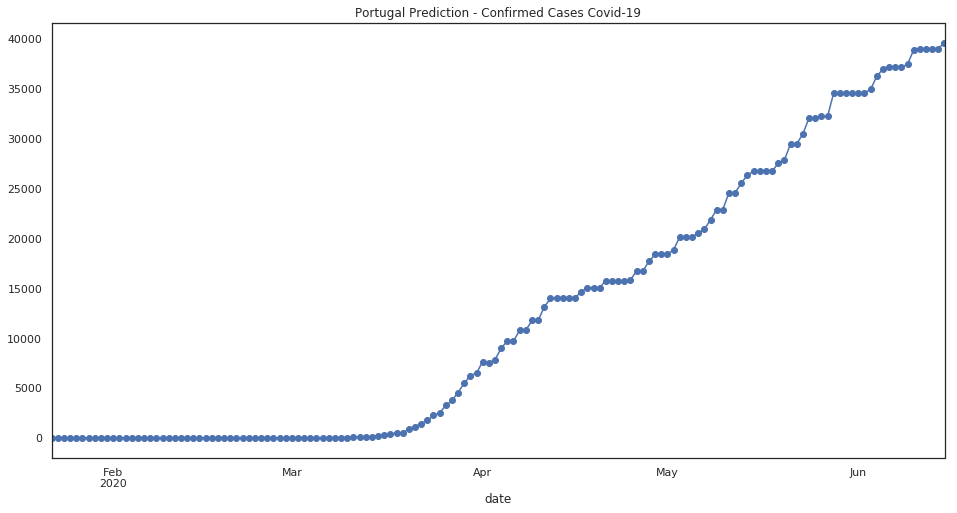

In [73]:
p6=pred['Portugal_nan']
p6.plot(marker='o',figsize=(16,8),title ='Portugal Prediction - Confirmed Cases Covid-19')

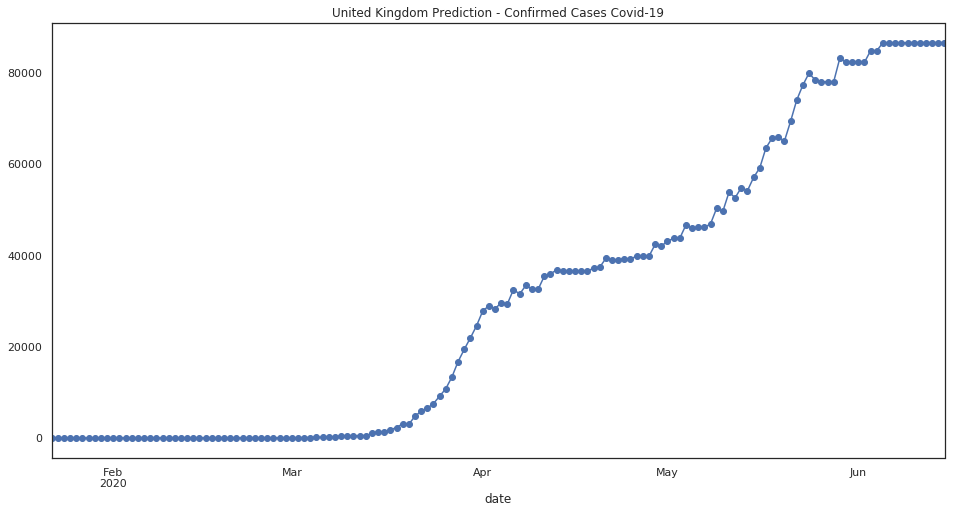

In [74]:
p8=pred['United Kingdom_nan']
p8.plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

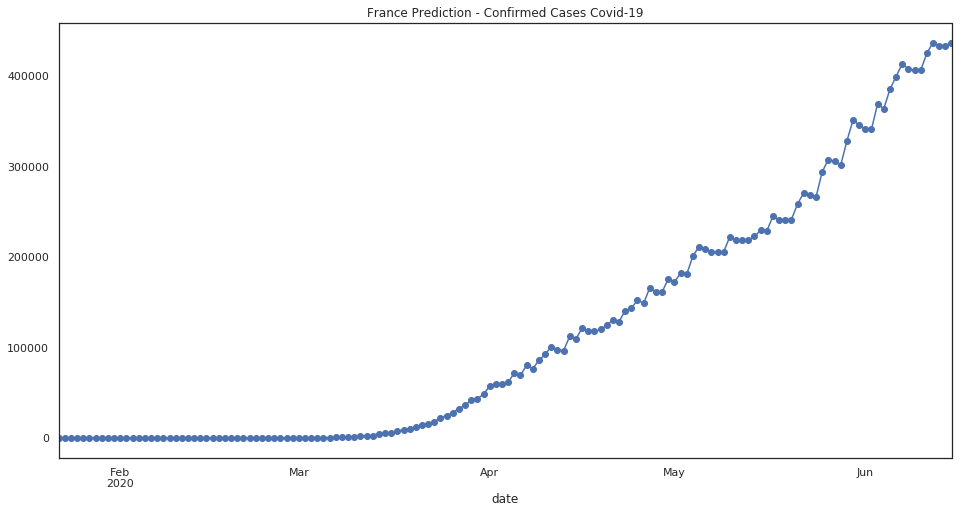

In [75]:
p9=pred['France_nan']
p9.plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

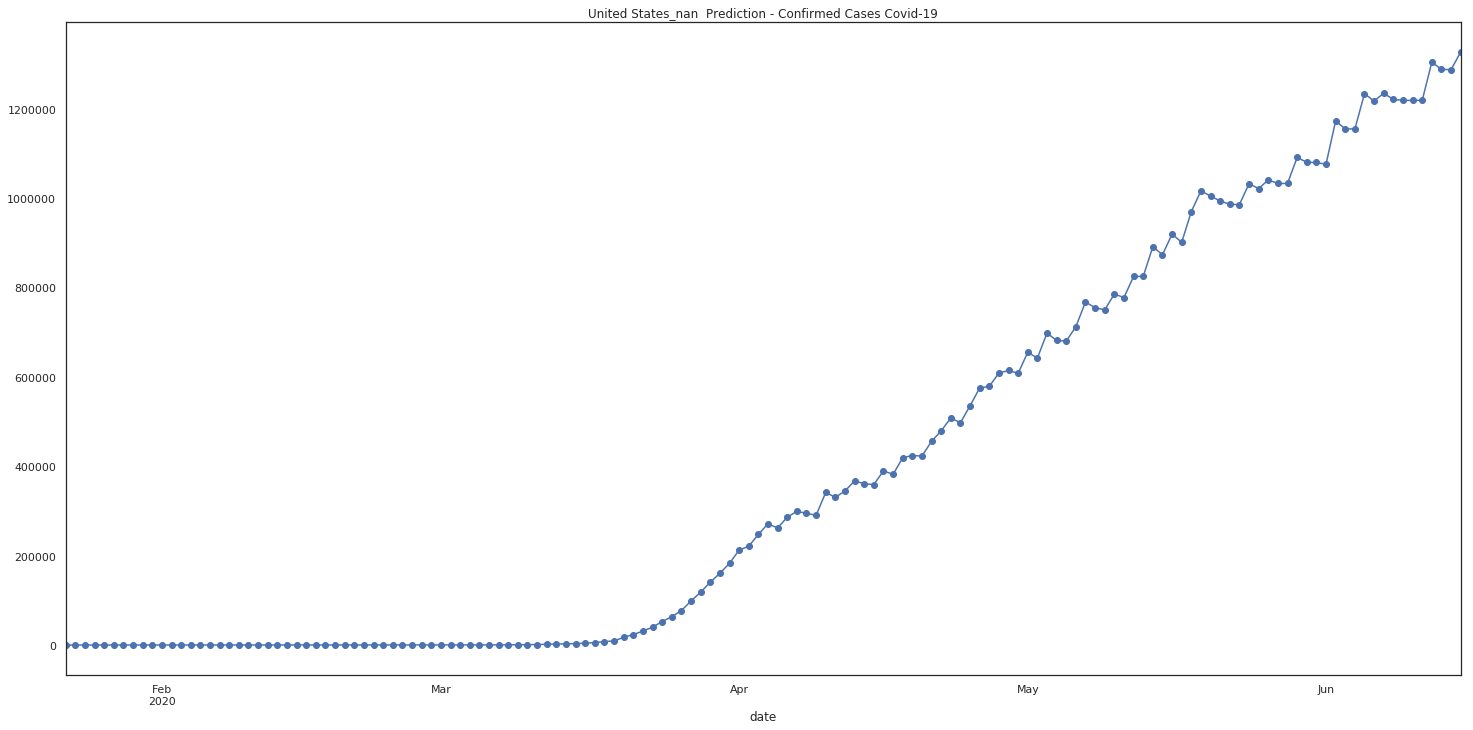

In [76]:
p10=pred['United States_nan']
p10.plot(marker='o',figsize=(25,12),title ='United States_nan  Prediction - Confirmed Cases Covid-19')

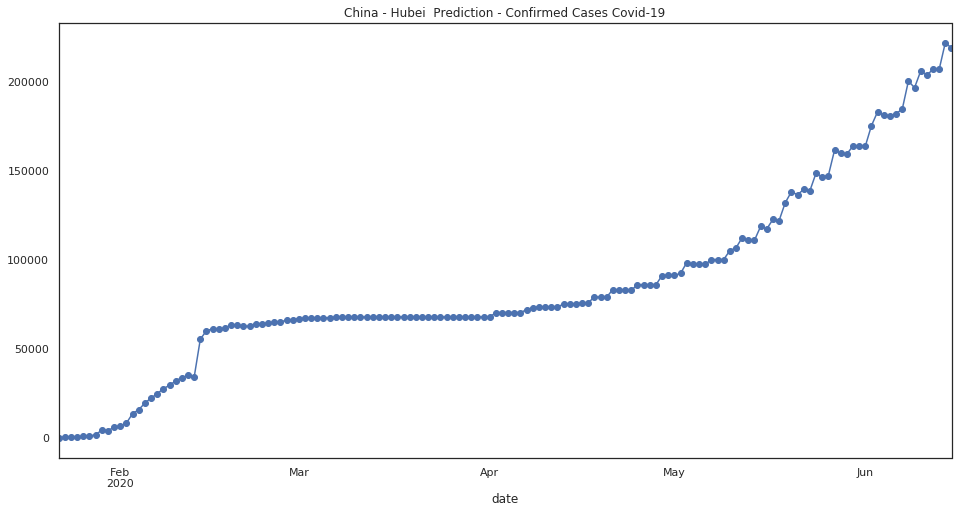

In [77]:
p11=pred['China_Hubei']
p11.plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

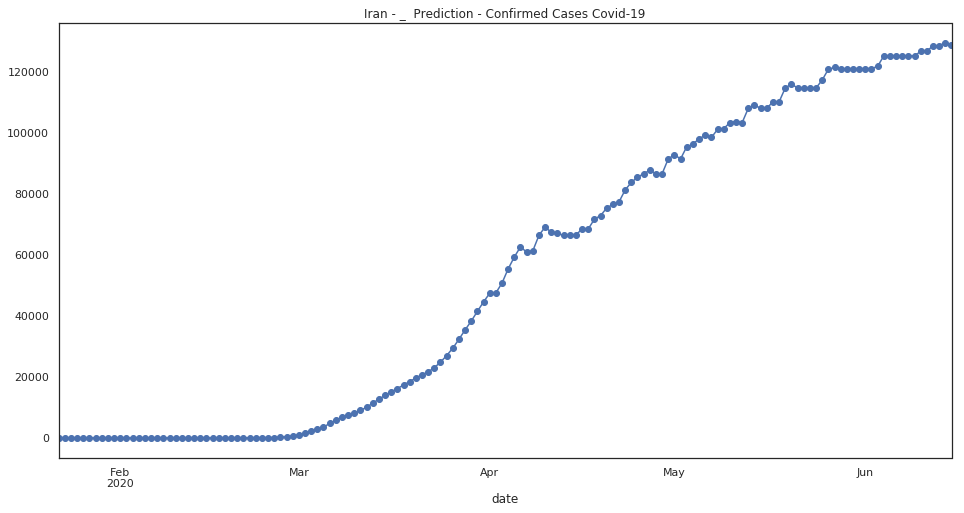

In [78]:
p12=pred['Iran_nan']
p12.plot(marker='o',figsize=(16,8),title ='Iran - _  Prediction - Confirmed Cases Covid-19')

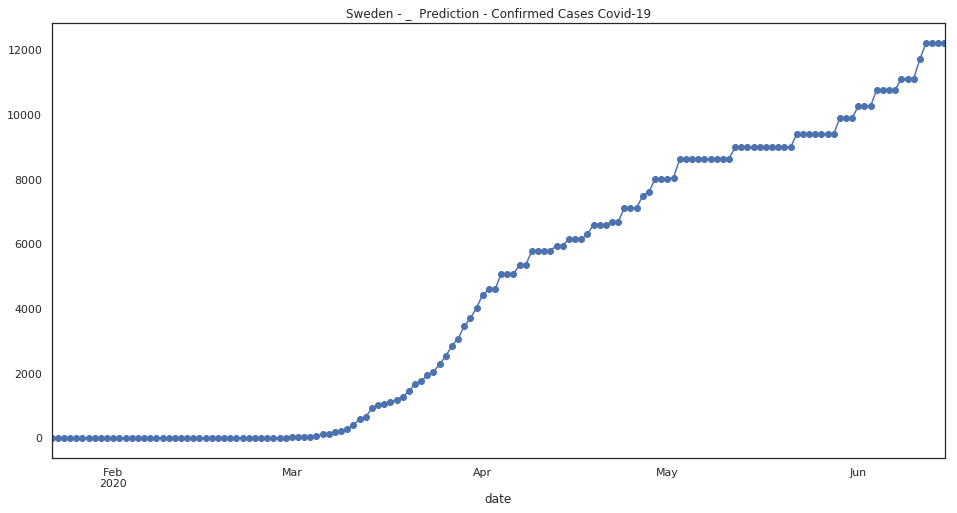

In [79]:
p13=pred['Sweden_nan']
p13.plot(marker='o',figsize=(16,8),title ='Sweden - _  Prediction - Confirmed Cases Covid-19')

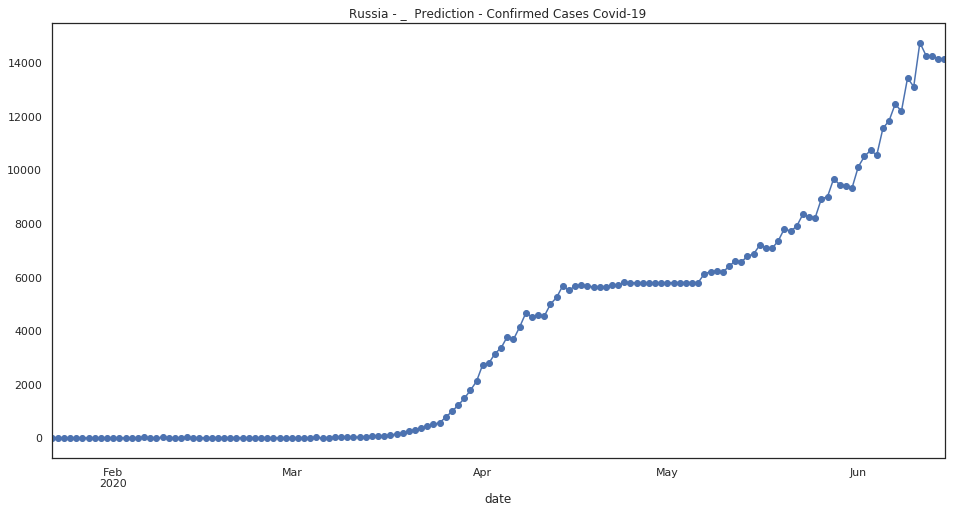

In [80]:
p13=pred['Russia_nan']
p13.plot(marker='o',figsize=(16,8),title ='Russia - _  Prediction - Confirmed Cases Covid-19')

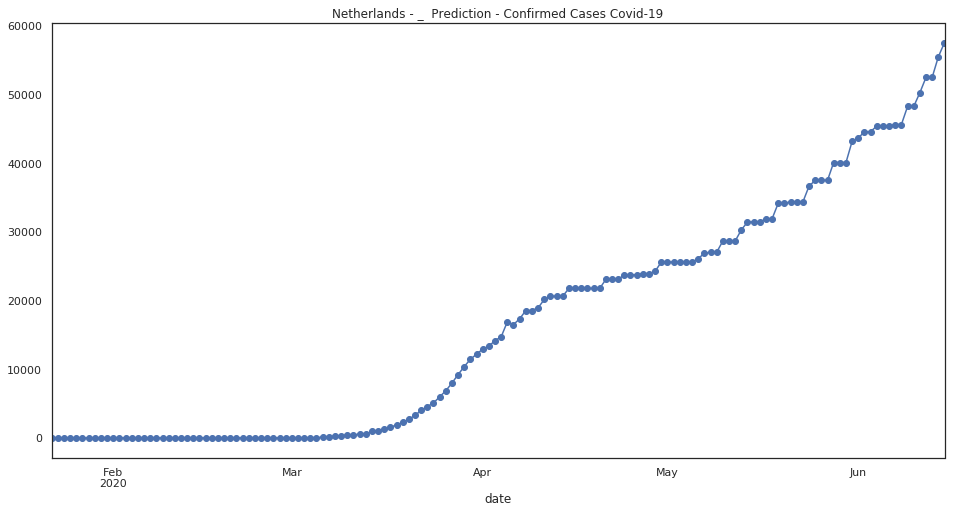

In [81]:
p14=pred['Netherlands_nan']
p14.plot(marker='o',figsize=(16,8),title ='Netherlands - _  Prediction - Confirmed Cases Covid-19')

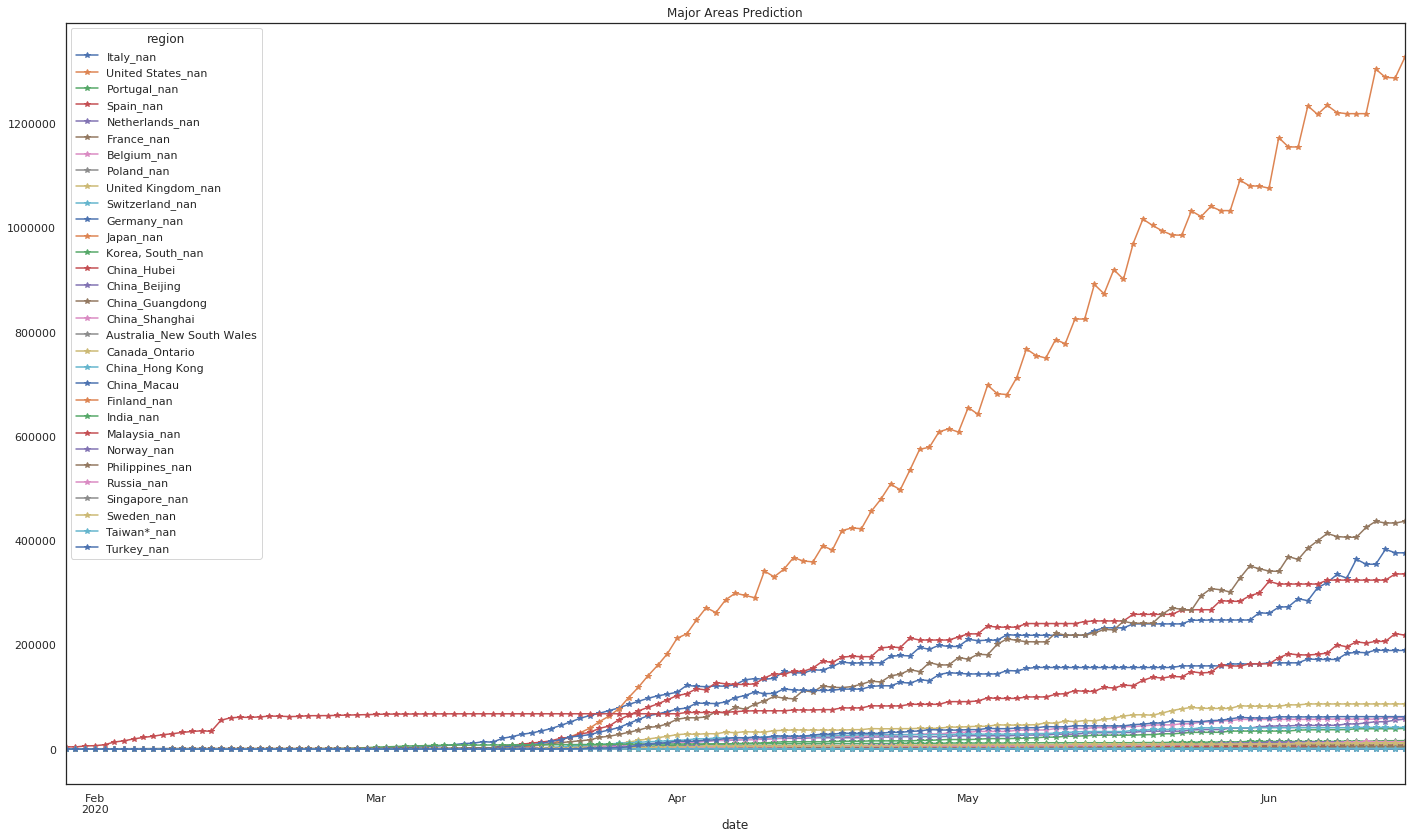

In [82]:
#region=my_train_list
pv2=pred[my_train_list]
pv2=pv2[7:]
pv2.plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

In [83]:
pv1=pv2 #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)


## Prediction Heatmap

In [84]:
p[:]

region,Italy_nan,United States_nan,Portugal_nan,Spain_nan,Netherlands_nan,France_nan,Belgium_nan,Poland_nan,United Kingdom_nan,Switzerland_nan,...,Finland_nan,India_nan,Malaysia_nan,Norway_nan,Philippines_nan,Russia_nan,Singapore_nan,Sweden_nan,Taiwan*_nan,Turkey_nan
date,,,,,,,,,,,,,,,,,,,,,
2020-01-29,11.0,5.0,7.0,7.0,-0.0,14.0,4.0,-0.0,7.0,-0.0,...,2.0,17.0,10.0,-0.0,9.0,12.0,17.0,3.0,9.0,-0.0
2020-01-30,14.0,5.0,6.0,6.0,-0.0,17.0,4.0,-0.0,5.0,-0.0,...,2.0,18.0,16.0,-0.0,8.0,9.0,19.0,5.0,9.0,-0.0
2020-01-31,7.0,5.0,9.0,9.0,-0.0,10.0,6.0,-0.0,5.0,-0.0,...,1.0,17.0,17.0,-0.0,9.0,14.0,23.0,4.0,10.0,-0.0
2020-02-01,10.0,8.0,11.0,11.0,-0.0,11.0,6.0,-0.0,10.0,-0.0,...,3.0,14.0,15.0,-0.0,9.0,9.0,24.0,8.0,11.0,-0.0
2020-02-02,10.0,9.0,6.0,7.0,-0.0,13.0,9.0,-0.0,10.0,-0.0,...,3.0,15.0,17.0,-0.0,10.0,9.0,26.0,6.0,10.0,-0.0
2020-02-03,15.0,9.0,13.0,14.0,-0.0,12.0,7.0,-0.0,9.0,-0.0,...,5.0,16.0,20.0,-0.0,12.0,8.0,30.0,10.0,10.0,-0.0
2020-02-04,14.0,13.0,17.0,18.0,-0.0,19.0,4.0,-0.0,12.0,-0.0,...,3.0,22.0,19.0,-0.0,11.0,14.0,29.0,10.0,10.0,-0.0
2020-02-05,14.0,12.0,13.0,14.0,-0.0,17.0,10.0,-0.0,10.0,-0.0,...,7.0,18.0,20.0,-0.0,11.0,12.0,37.0,9.0,11.0,-0.0
2020-02-06,13.0,12.0,9.0,10.0,-0.0,18.0,13.0,-0.0,12.0,-0.0,...,6.0,17.0,23.0,-0.0,9.0,26.0,40.0,11.0,11.0,-0.0


In [85]:
pip install gmplot

Note: you may need to restart the kernel to use updated packages.


In [86]:
p.to_csv('/home/notebookuser/notebooks/covid19/p_confirmed_daily.csv', index = False, header=True)

In [87]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [88]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
heatmap=heatmap[heatmap['region'].isin(region)]
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [89]:
heatmap_m[:]

,region,Lat,Long,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,...,2020-06-06 00:00:00,2020-06-07 00:00:00,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00
0,Australia_New South Wales,-33.8688,151.2093,11.0,15.0,13.0,16.0,11.0,16.0,11.0,...,4639.0,4639.0,4808.0,4808.0,4808.0,5139.0,5139.0,5139.0,5388.0,5662.0
1,Belgium_nan,50.8333,4.0000,4.0,4.0,6.0,6.0,9.0,7.0,4.0,...,56993.0,57428.0,57428.0,57428.0,57428.0,57428.0,57428.0,59892.0,59892.0,60532.0
2,China_Hong Kong,22.3000,114.2000,15.0,18.0,17.0,20.0,17.0,21.0,19.0,...,1396.0,1396.0,1396.0,1434.0,1434.0,1434.0,1510.0,1536.0,1536.0,1536.0
3,China_Hubei,30.9756,112.2707,4533.0,4101.0,6014.0,6605.0,8341.0,13640.0,15863.0,...,181841.0,184278.0,200055.0,196359.0,205711.0,203424.0,206654.0,206654.0,221641.0,218509.0
4,China_Macau,22.1667,113.5500,7.0,7.0,7.0,7.0,7.0,8.0,8.0,...,88.0,88.0,92.0,92.0,92.0,92.0,92.0,95.0,97.0,99.0
5,France_nan,46.2276,2.2137,14.0,17.0,10.0,11.0,13.0,12.0,19.0,...,399534.0,413699.0,407824.0,406430.0,406430.0,425272.0,436970.0,433777.0,433777.0,437040.0
6,Germany_nan,51.0000,9.0000,8.0,12.0,13.0,12.0,17.0,17.0,20.0,...,172051.0,172051.0,172051.0,183531.0,185731.0,184923.0,189909.0,189233.0,189233.0,189233.0
7,India_nan,21.0000,78.0000,17.0,18.0,17.0,14.0,15.0,16.0,22.0,...,3762.0,3717.0,3895.0,3836.0,3869.0,4223.0,4157.0,4144.0,4100.0,4094.0
8,Iran_nan,32.0000,53.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Iran_nan,32.0000,53.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
heatmap=pd.DataFrame()
vmaxni=len(heatmap_m)
vmaxnii=(vmaxni)-1
for i in range(0,len(heatmap)):
    if heatmap_m.iloc[i,vmaxni].astype(int)==0:     #### heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
        continue
    #heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 
    heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:vmaxnii]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 


In [91]:
### Joao - Print in datetime
from datetime import datetime
#
latitudes = heatmap_m['Lat']
longitudes = heatmap_m['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
heatmap=heatmap_m
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
datemap=datetime.today().strftime('%Y-%m-%d')
# Generate the heatmap into an HTML file
gmap.draw("Heatmap-"+datemap+".html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this month of March!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this month of March!
 April-May-June are going to be hard with this Global Lock-Down!


In [93]:
exit()

H2O session _sid_9391 closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
